In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# Data Gathering

In [127]:
df=pd.read_csv('/content/accident data.csv')

In [128]:
df.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [130]:
df.shape

(660679, 14)

In [131]:
df.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [132]:
df.head(1)

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car


#EDA

<Axes: xlabel='Accident_Severity', ylabel='count'>

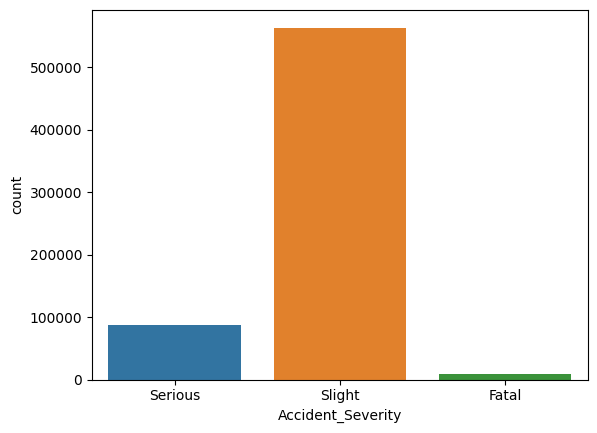

In [133]:
sns.countplot(x=df['Accident_Severity'])

In [134]:
df.isnull().sum()*100/len(df)

Index                      0.000000
Accident_Severity          0.000000
Accident Date              0.000000
Latitude                   0.003784
Light_Conditions           0.000000
District Area              0.000000
Longitude                  0.003935
Number_of_Casualties       0.000000
Number_of_Vehicles         0.000000
Road_Surface_Conditions    0.109887
Road_Type                  0.684145
Urban_or_Rural_Area        0.002270
Weather_Conditions         2.138406
Vehicle_Type               0.000000
dtype: float64

<Axes: >

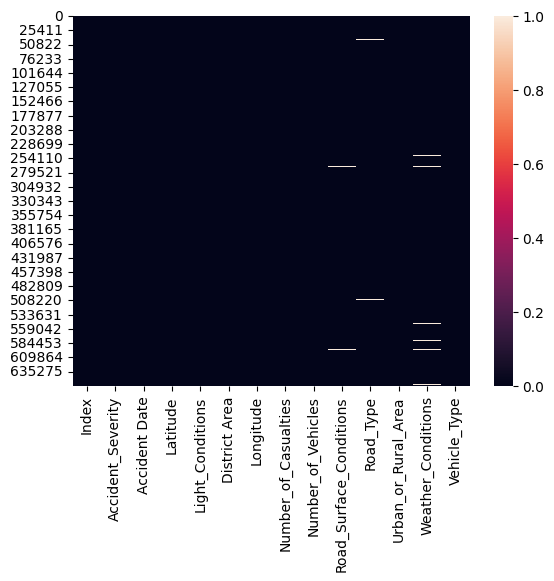

In [135]:
sns.heatmap(df.isnull())

In [136]:
df['Road_Type']=df['Road_Type'].fillna(df['Road_Type'].mode().iloc[0])
df['Weather_Conditions']=df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode().iloc[0])
df['Road_Surface_Conditions']=df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode().iloc[0])
df['Vehicle_Type']=df['Vehicle_Type'].fillna(df['Vehicle_Type'].mode().iloc[0])

In [137]:
df.isnull().sum()

Index                       0
Accident_Severity           0
Accident Date               0
Latitude                   25
Light_Conditions            0
District Area               0
Longitude                  26
Number_of_Casualties        0
Number_of_Vehicles          0
Road_Surface_Conditions     0
Road_Type                   0
Urban_or_Rural_Area        15
Weather_Conditions          0
Vehicle_Type                0
dtype: int64

In [138]:
df.dropna(inplace=True)

In [139]:
df.drop_duplicates(inplace=True)

In [140]:
df.duplicated().sum()

0

In [94]:
column=df.columns
column

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

In [95]:
for i in column:
  print(f'{i}:{df[i].unique()}')

Index:['200701BS64157' '200701BS65737' '200701BS66127' ... '201091NM01935'
 '201091NM01964' '201091NM02142']
Accident_Severity:['Serious' 'Slight' 'Fatal']
Accident Date:['05-06-2019' '02-07-2019' '26-08-2019' ... '26-12-2022' '25-07-2022'
 '25-12-2022']
Latitude:[51.506187 51.495029 51.517715 ... 57.585044 57.214898 57.57521 ]
Light_Conditions:['Darkness - lights lit' 'Daylight' 'Darkness - lighting unknown'
 'Darkness - lights unlit' 'Darkness - no lighting']
District Area:['Kensington and Chelsea' 'Westminster' 'Richmond upon Thames'
 'Hammersmith and Fulham' 'Hounslow' 'Tower Hamlets' 'City of London'
 'Southwark' 'Camden' 'Hackney' 'Islington' 'Barnet' 'Brent' 'Haringey'
 'Merton' 'Ealing' 'Enfield' 'Greenwich' 'Newham'
 'London Airport (Heathrow)' 'Hillingdon' 'Waltham Forest' 'Redbridge'
 'Barking and Dagenham' 'Bromley' 'Havering' 'Croydon' 'Lambeth'
 'Wandsworth' 'Sutton' 'Bexley' 'Lewisham' 'Harrow' 'Kingston upon Thames'
 'Barrow-in-Furness' 'South Lakeland' 'Carlisle' 'Eden

In [15]:
df['Urban_or_Rural_Area'].value_counts()

Urban    32910
Rural     4486
Urba         1
Name: Urban_or_Rural_Area, dtype: int64

In [31]:
cat = df.select_dtypes('object').columns
cat

Index(['Index', 'Accident_Severity', 'Accident Date', 'Light_Conditions',
       'District Area', 'Road_Surface_Conditions', 'Road_Type',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

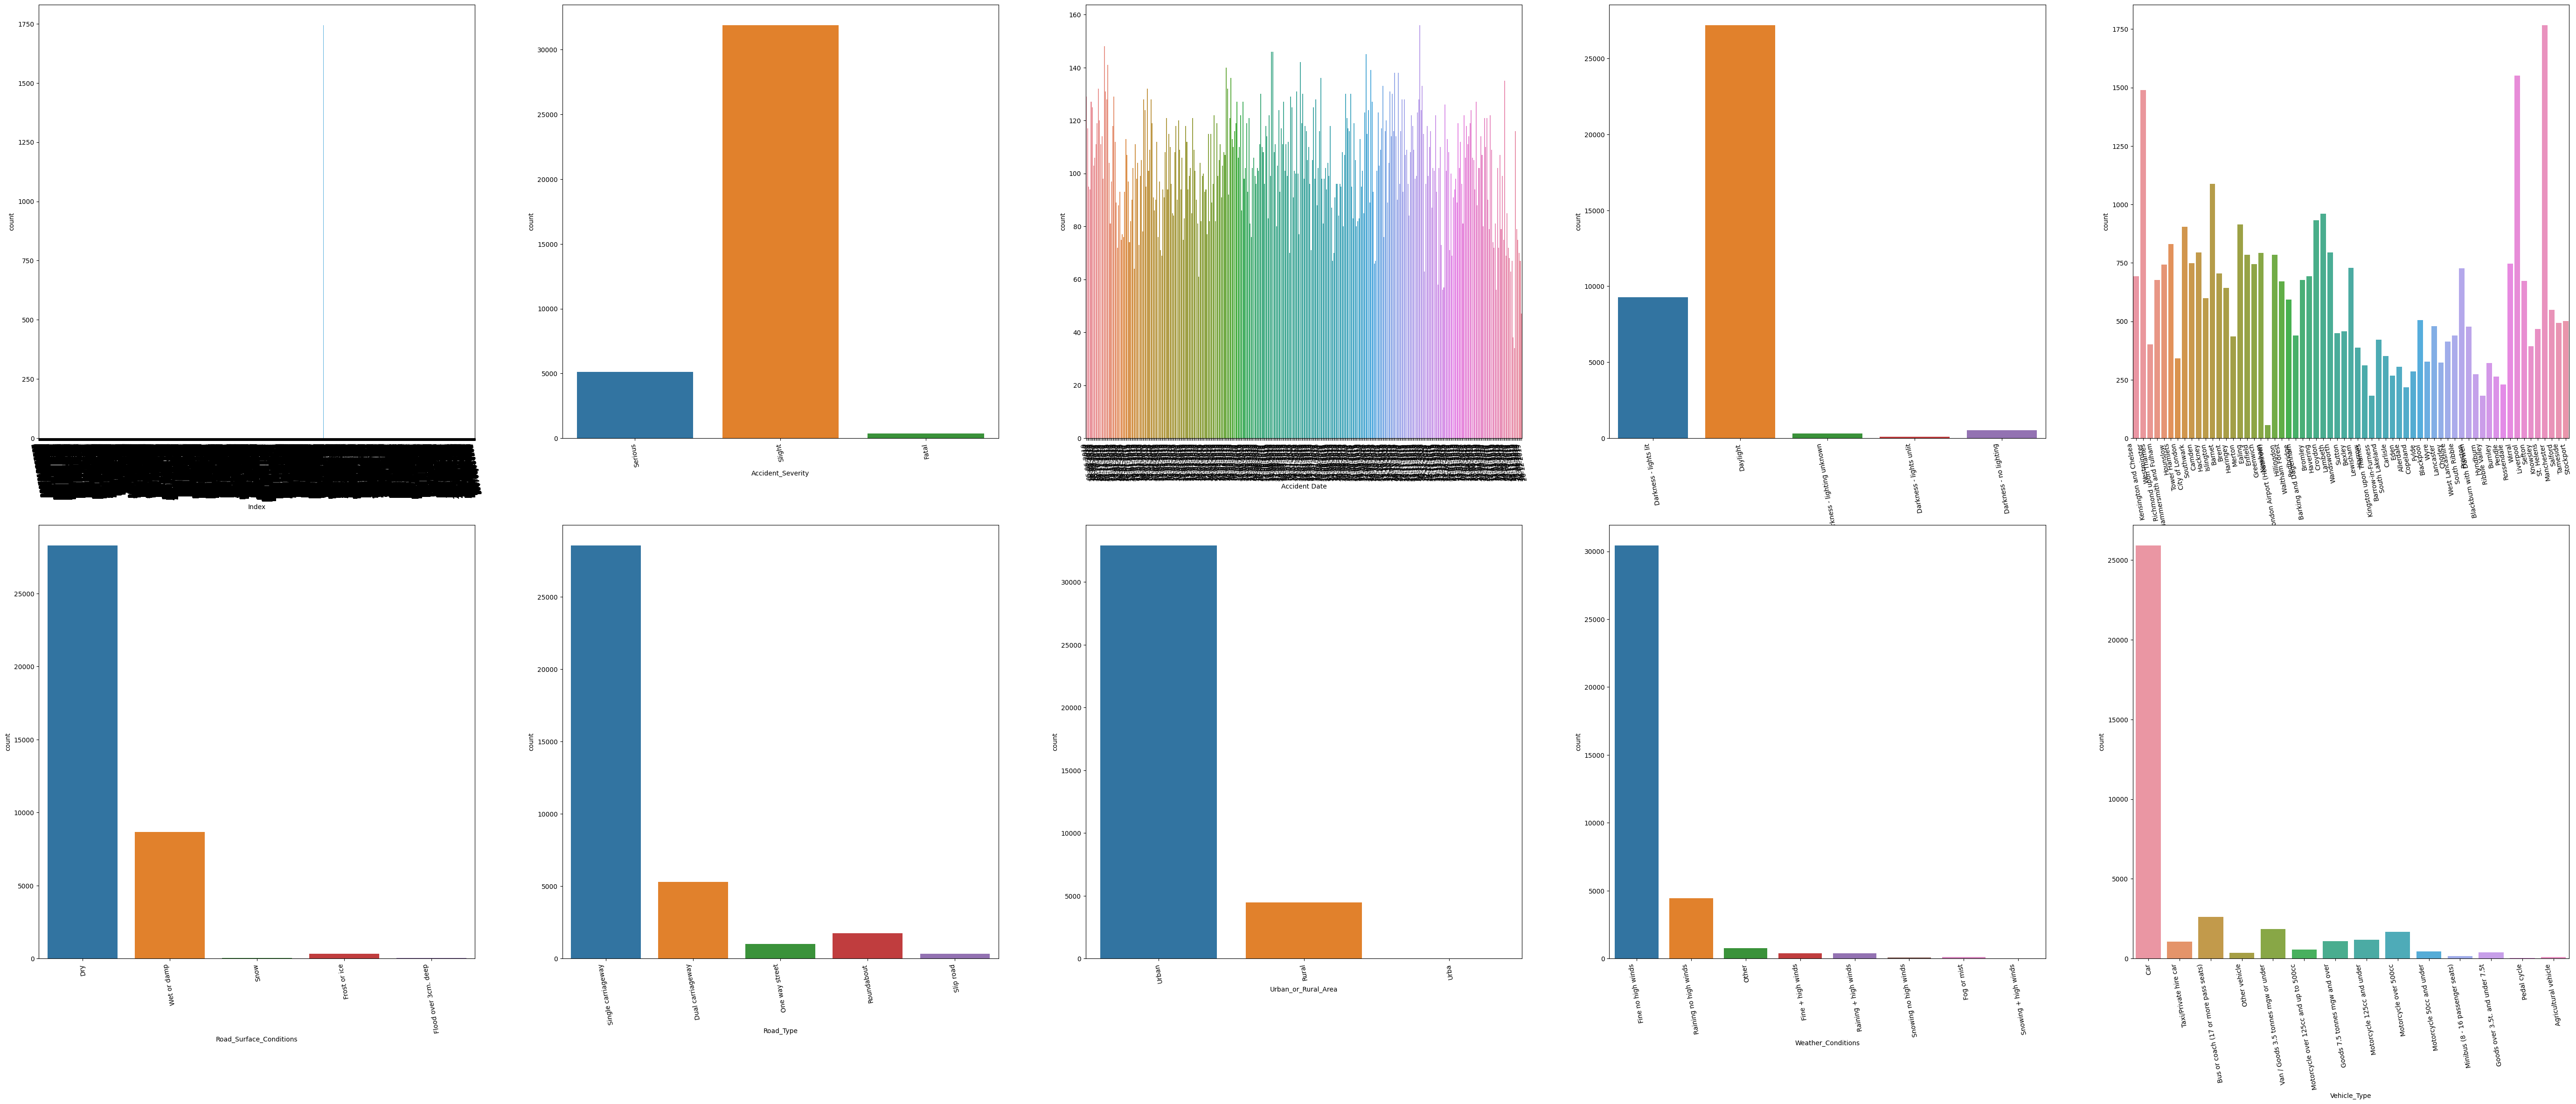

In [17]:
plt.figure(figsize=(70, 70))
for i in range(len(cat)):
  plt.subplot(5,5,i+1)
  sns.countplot(data=df,x=cat[i])
  plt.xticks(rotation=100)

In [27]:
df['Accident_Severity'].value_counts()

Slight     31893
Serious     5133
Fatal        371
Name: Accident_Severity, dtype: int64

In [18]:
object_columns = df.select_dtypes(include=['object']).columns
object_columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Light_Conditions',
       'District Area', 'Road_Surface_Conditions', 'Road_Type',
       'Urban_or_Rural_Area', 'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

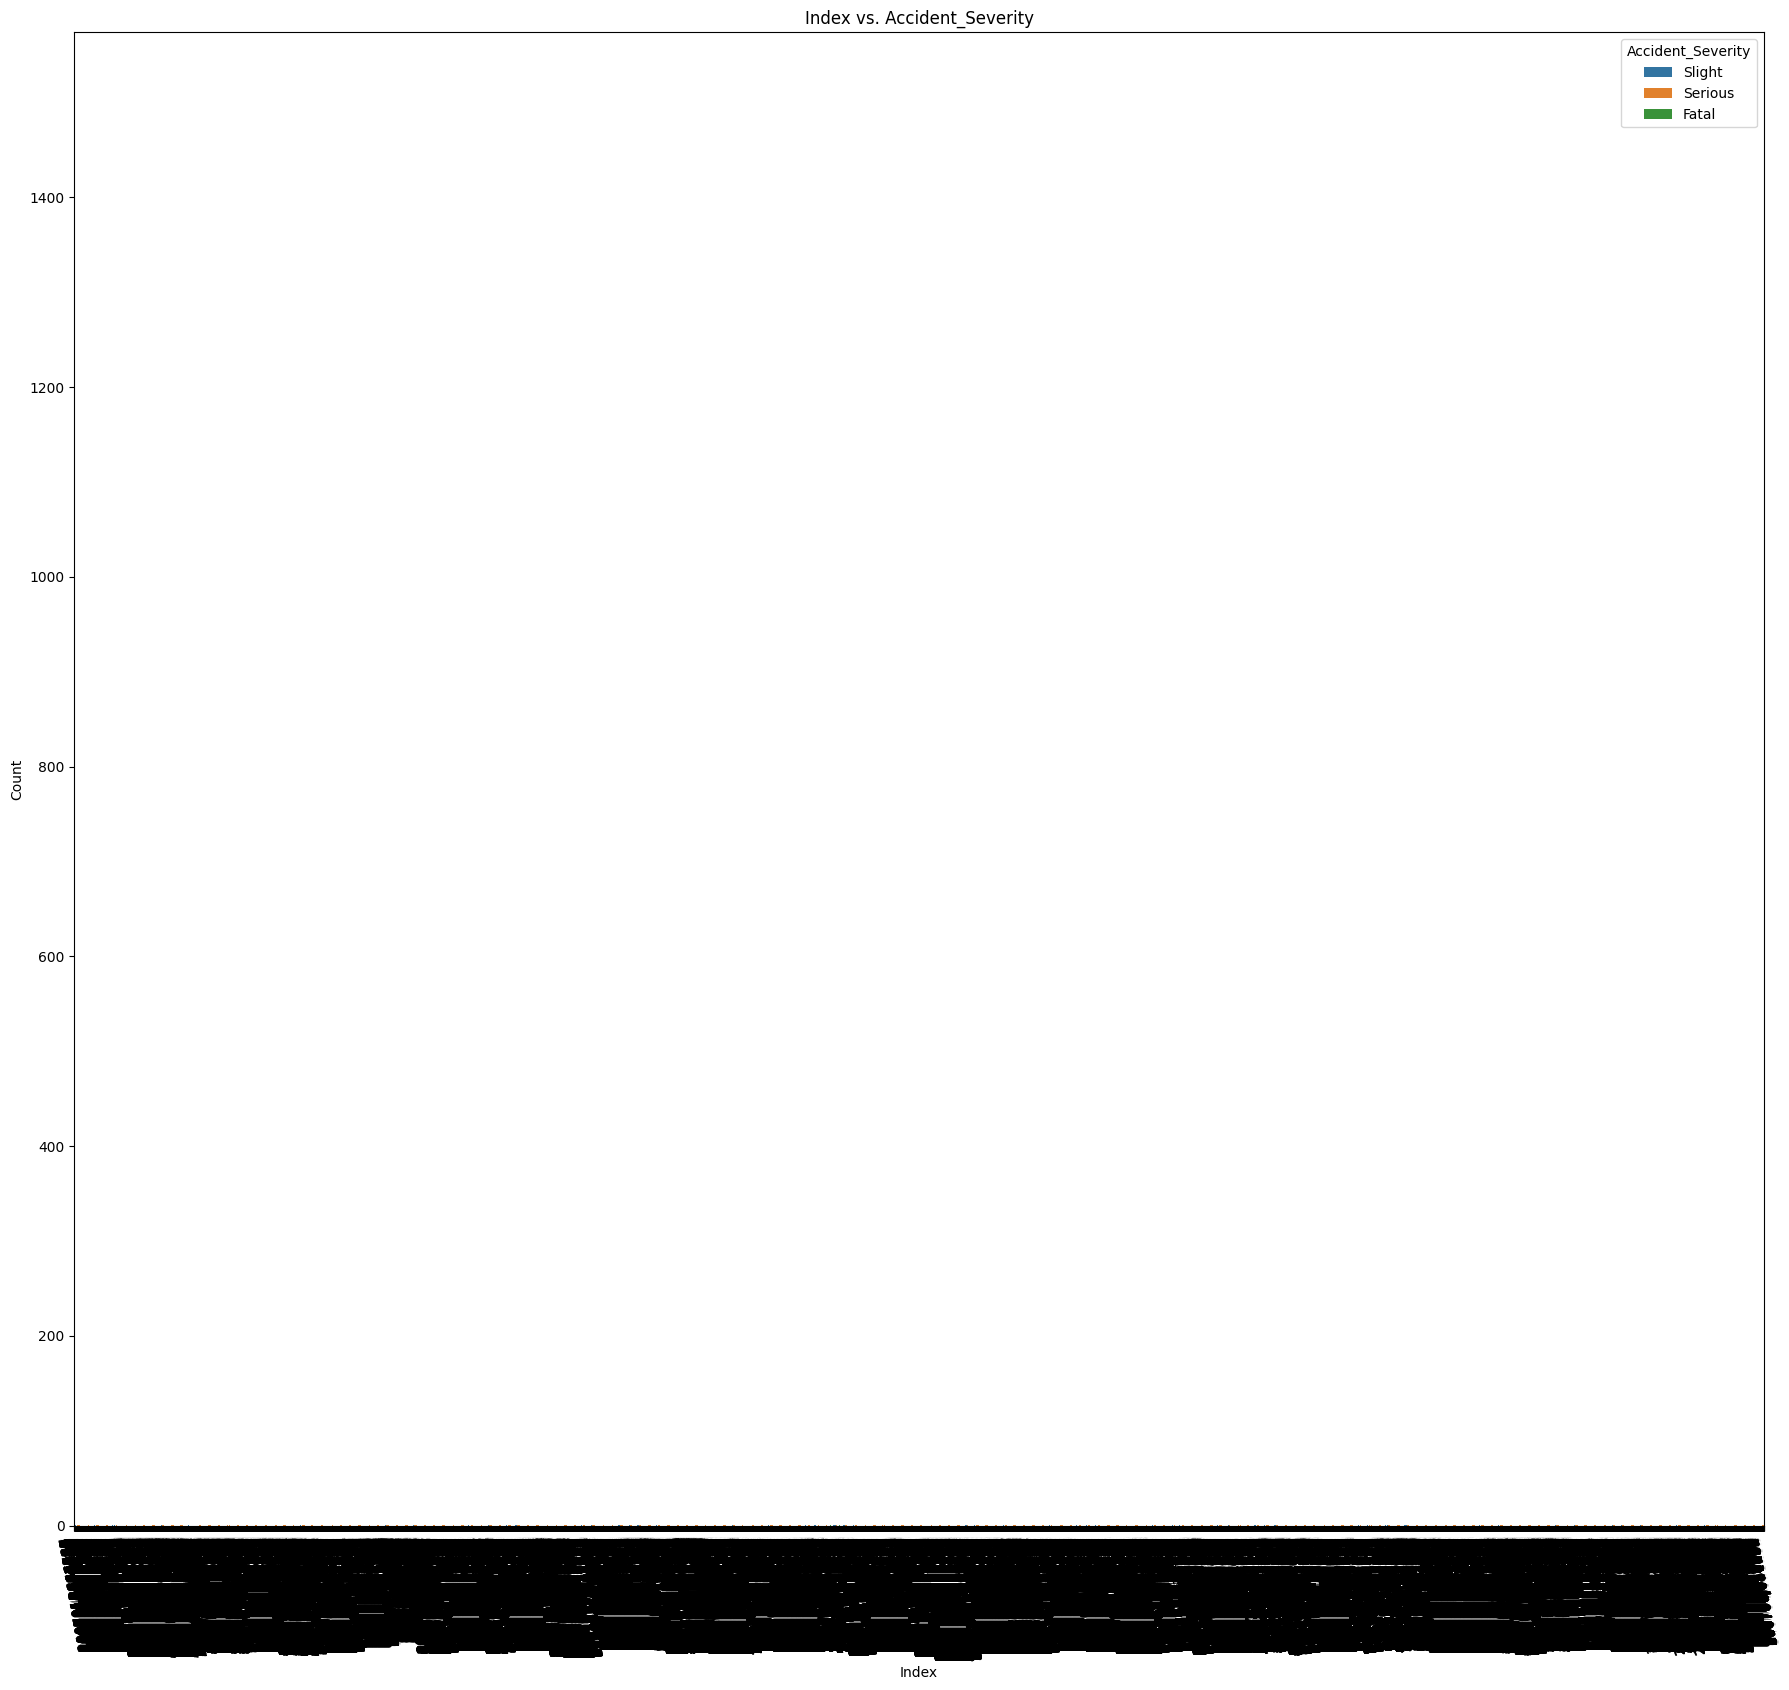

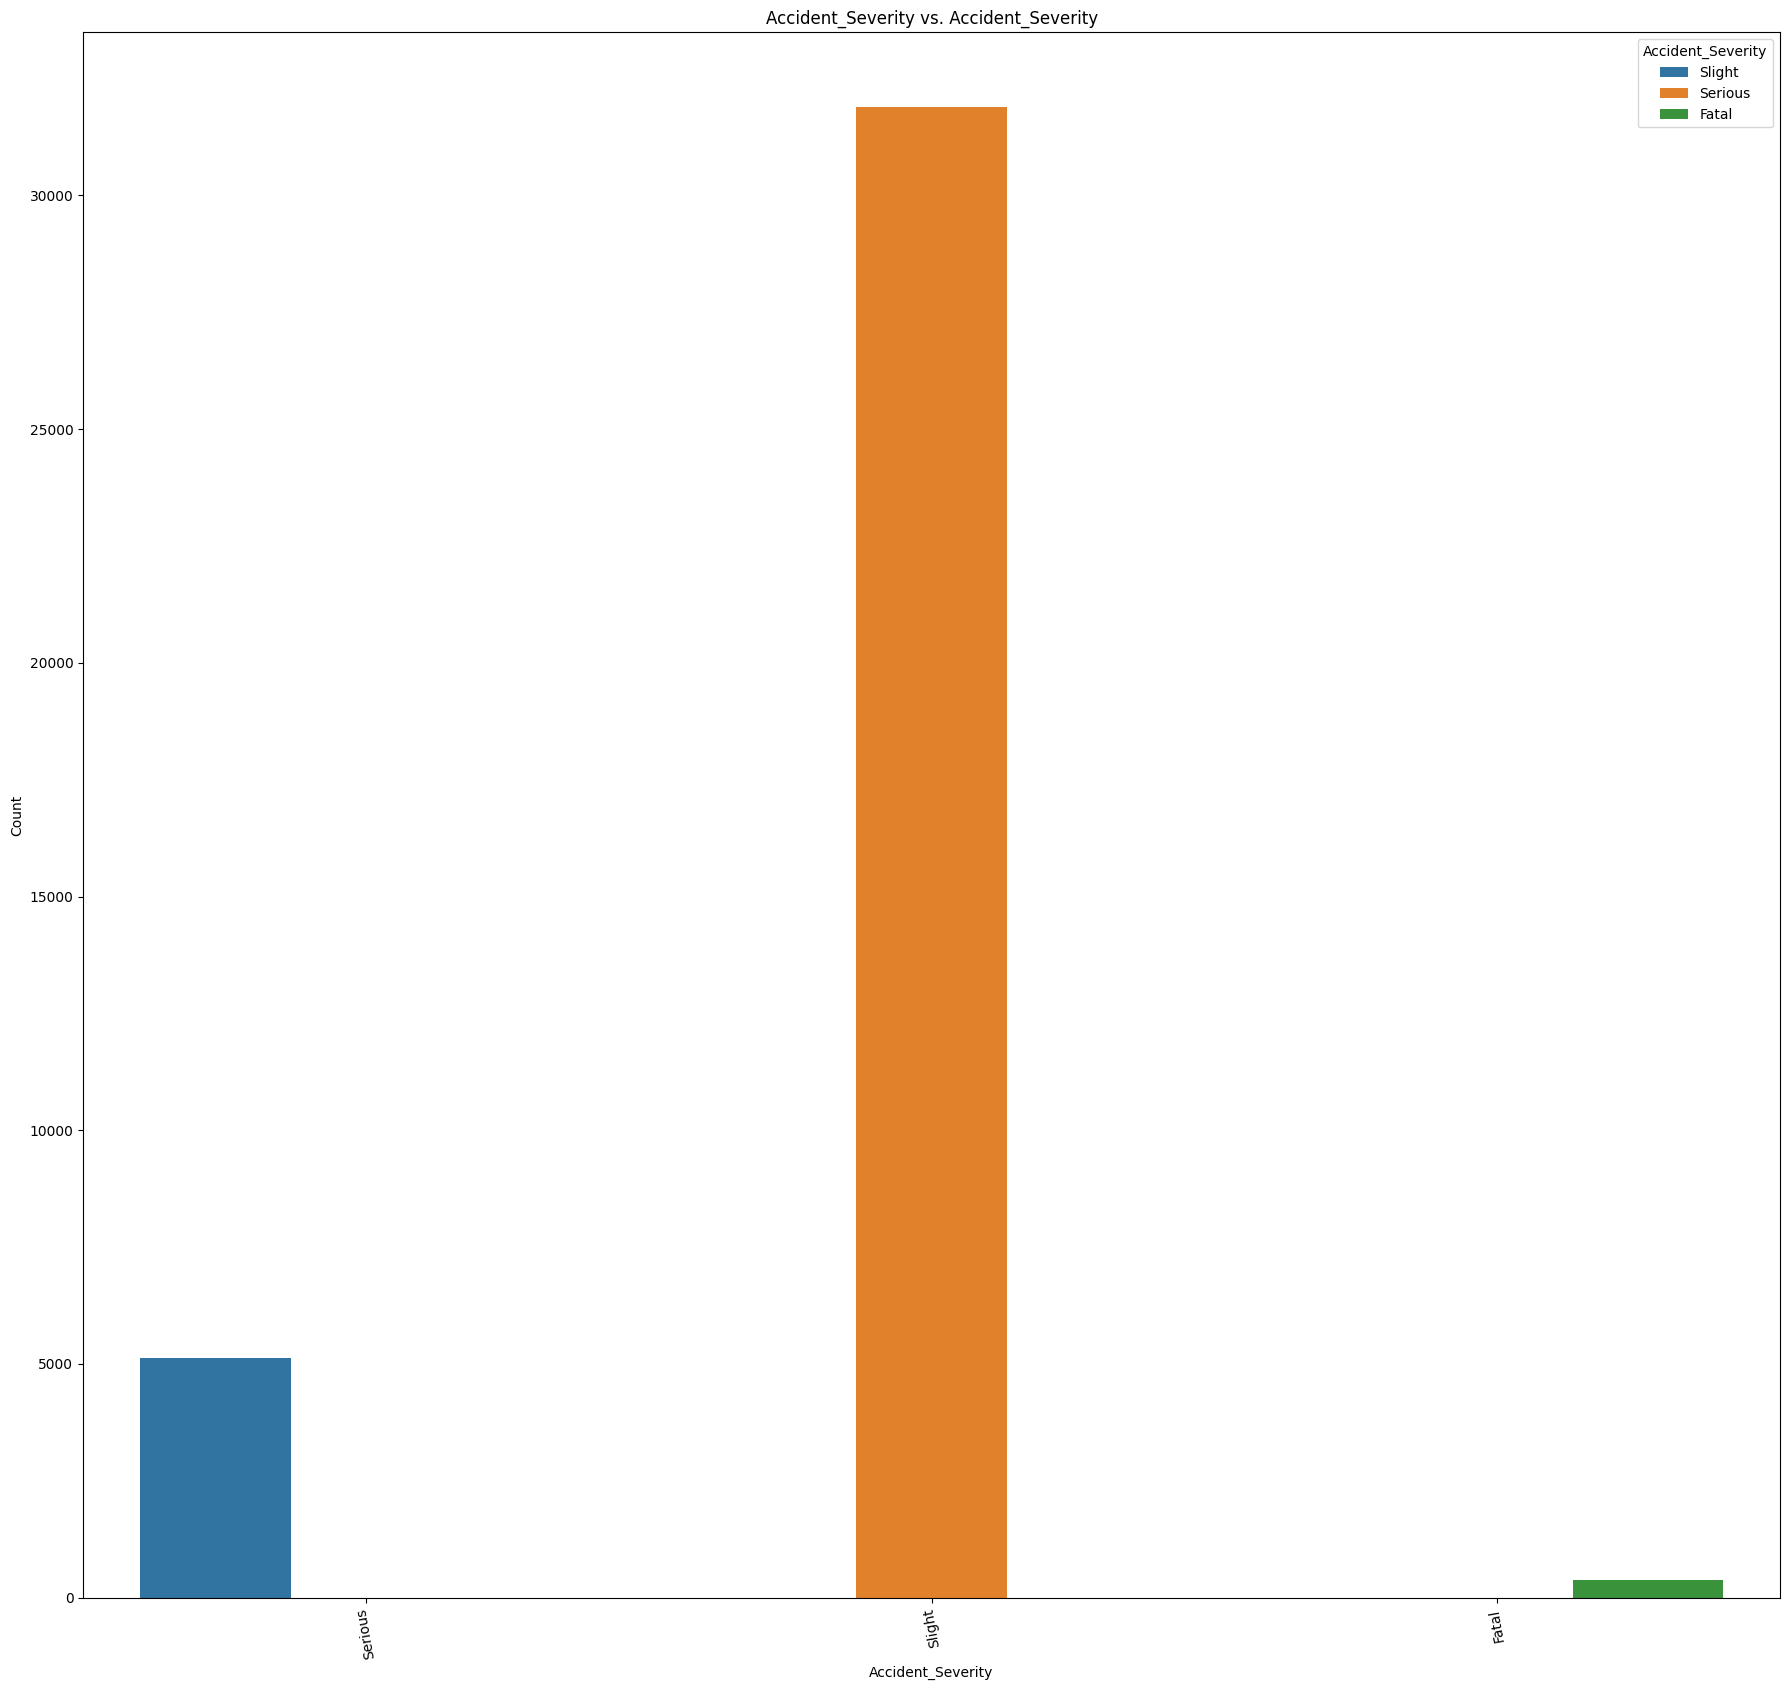

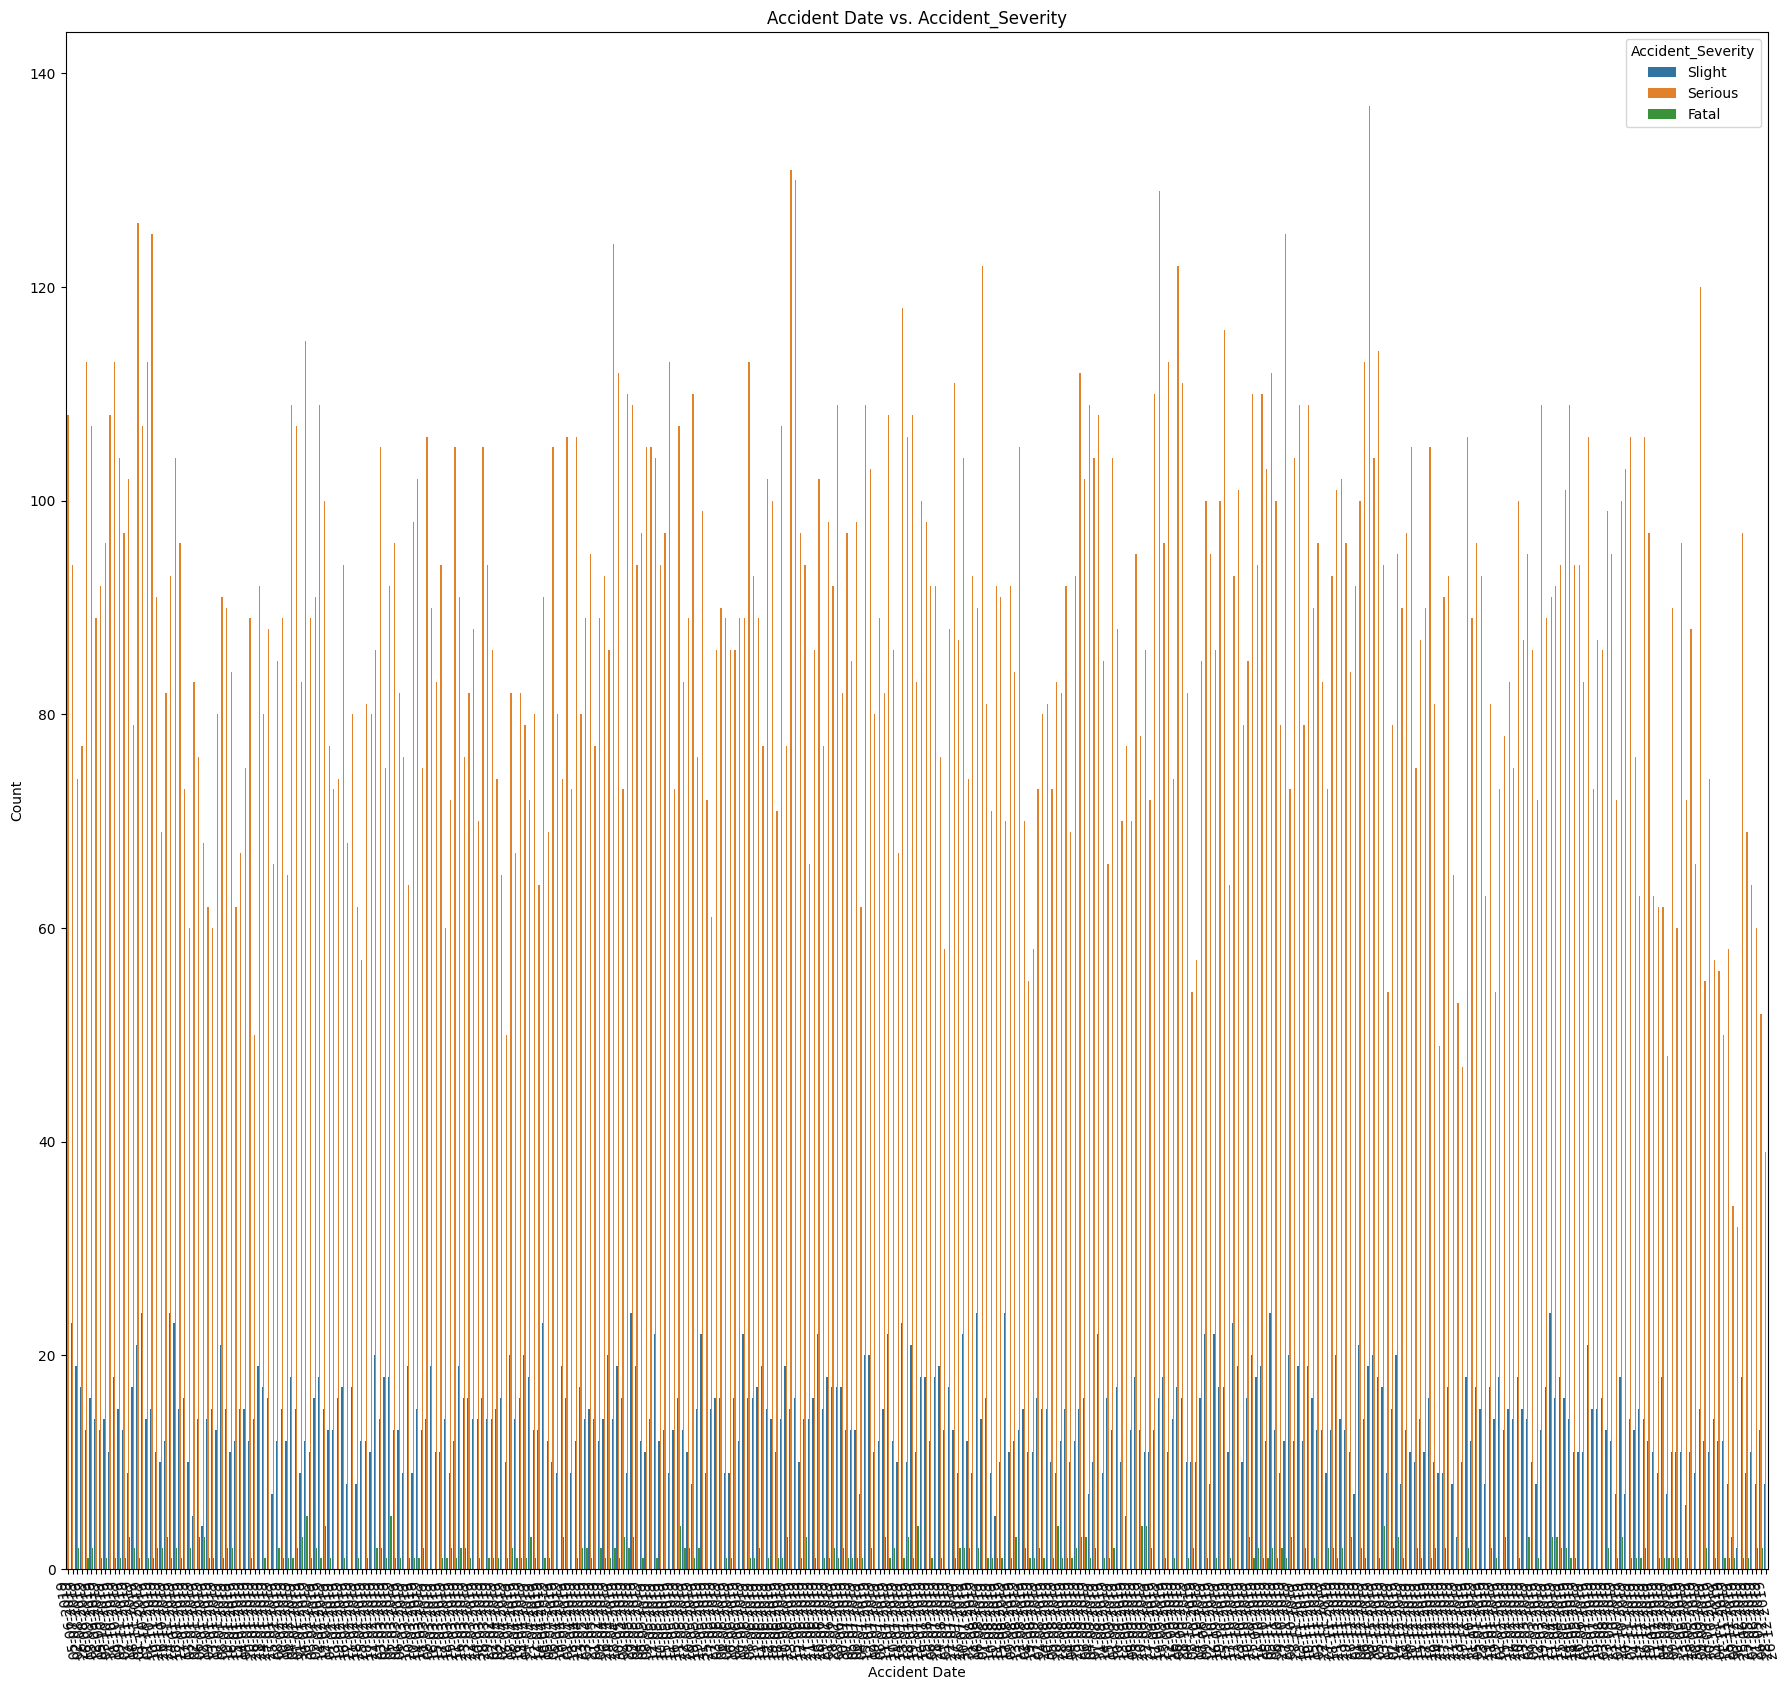

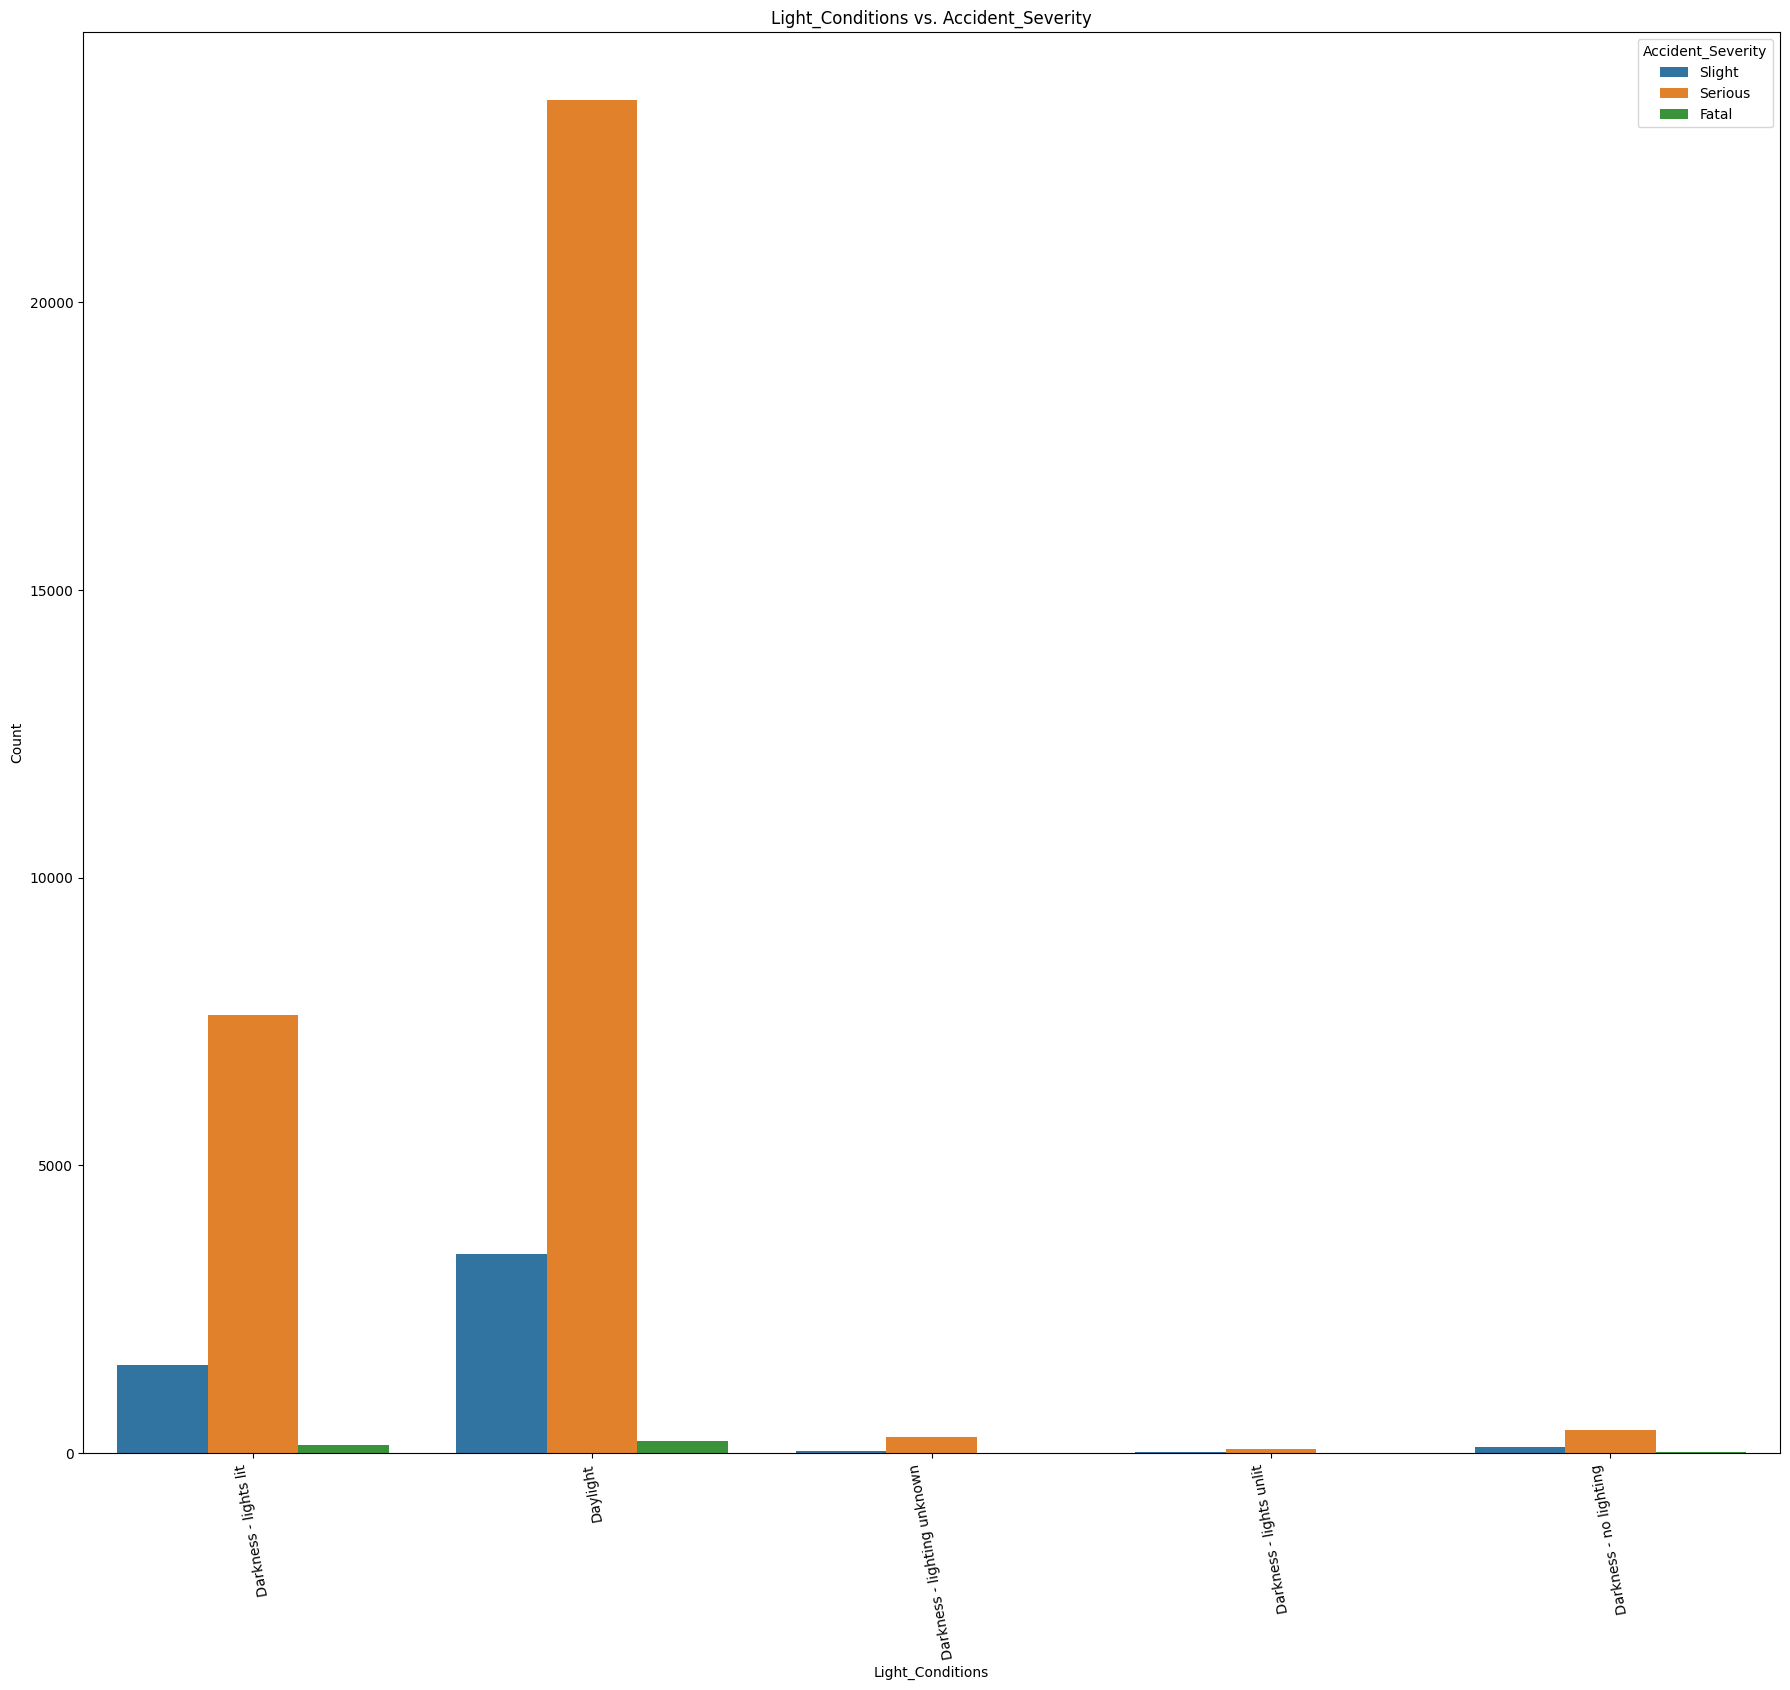

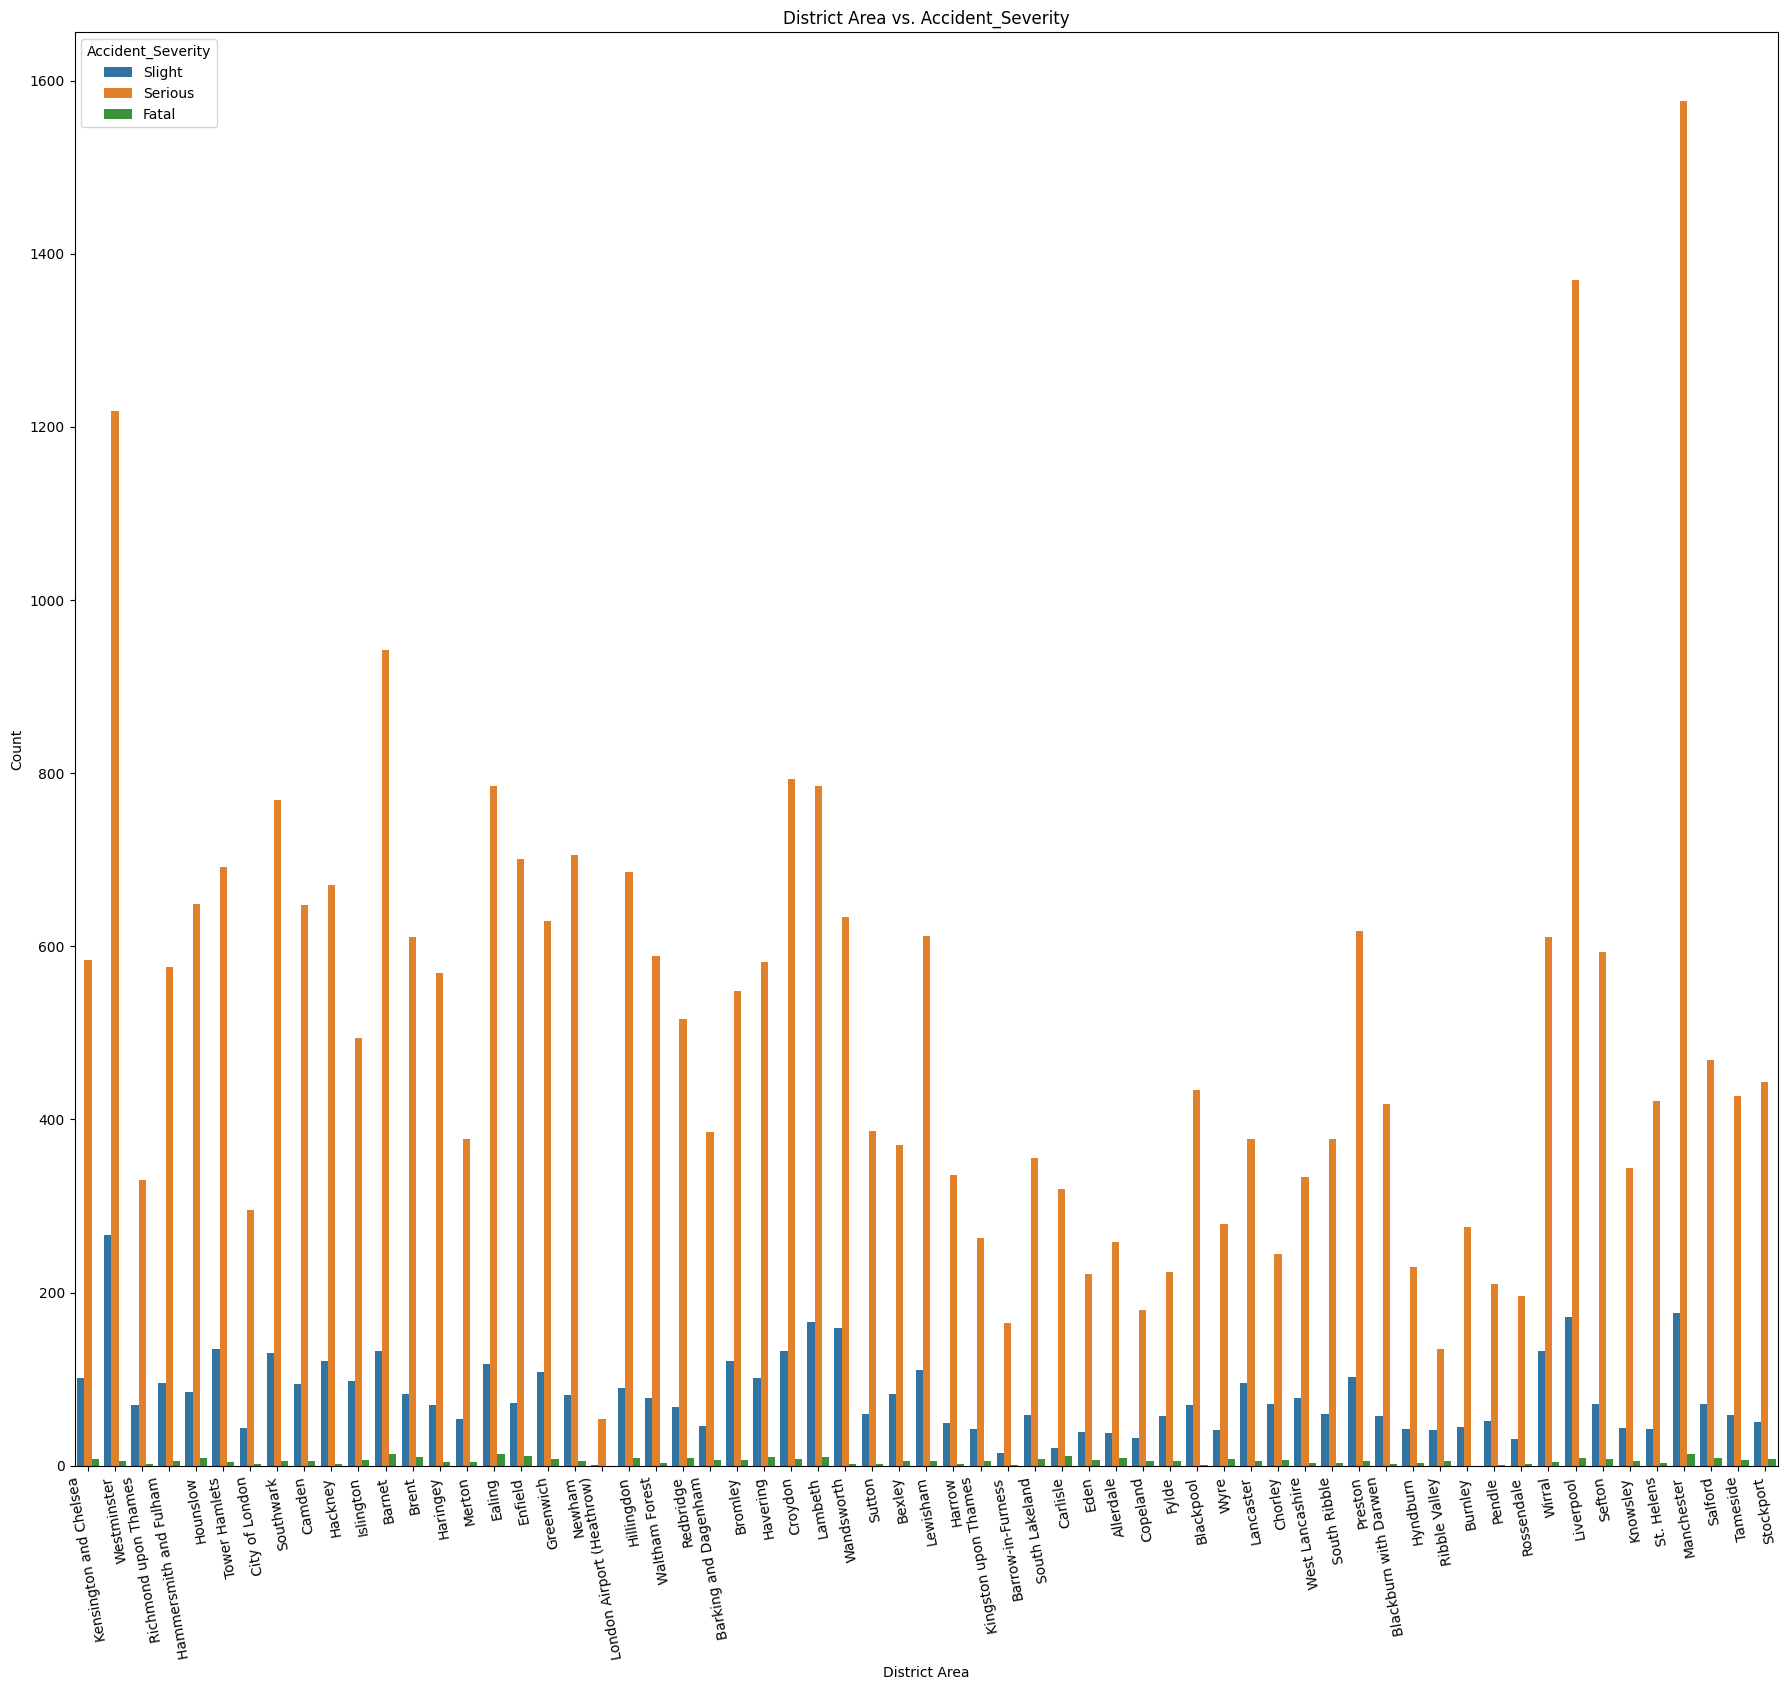

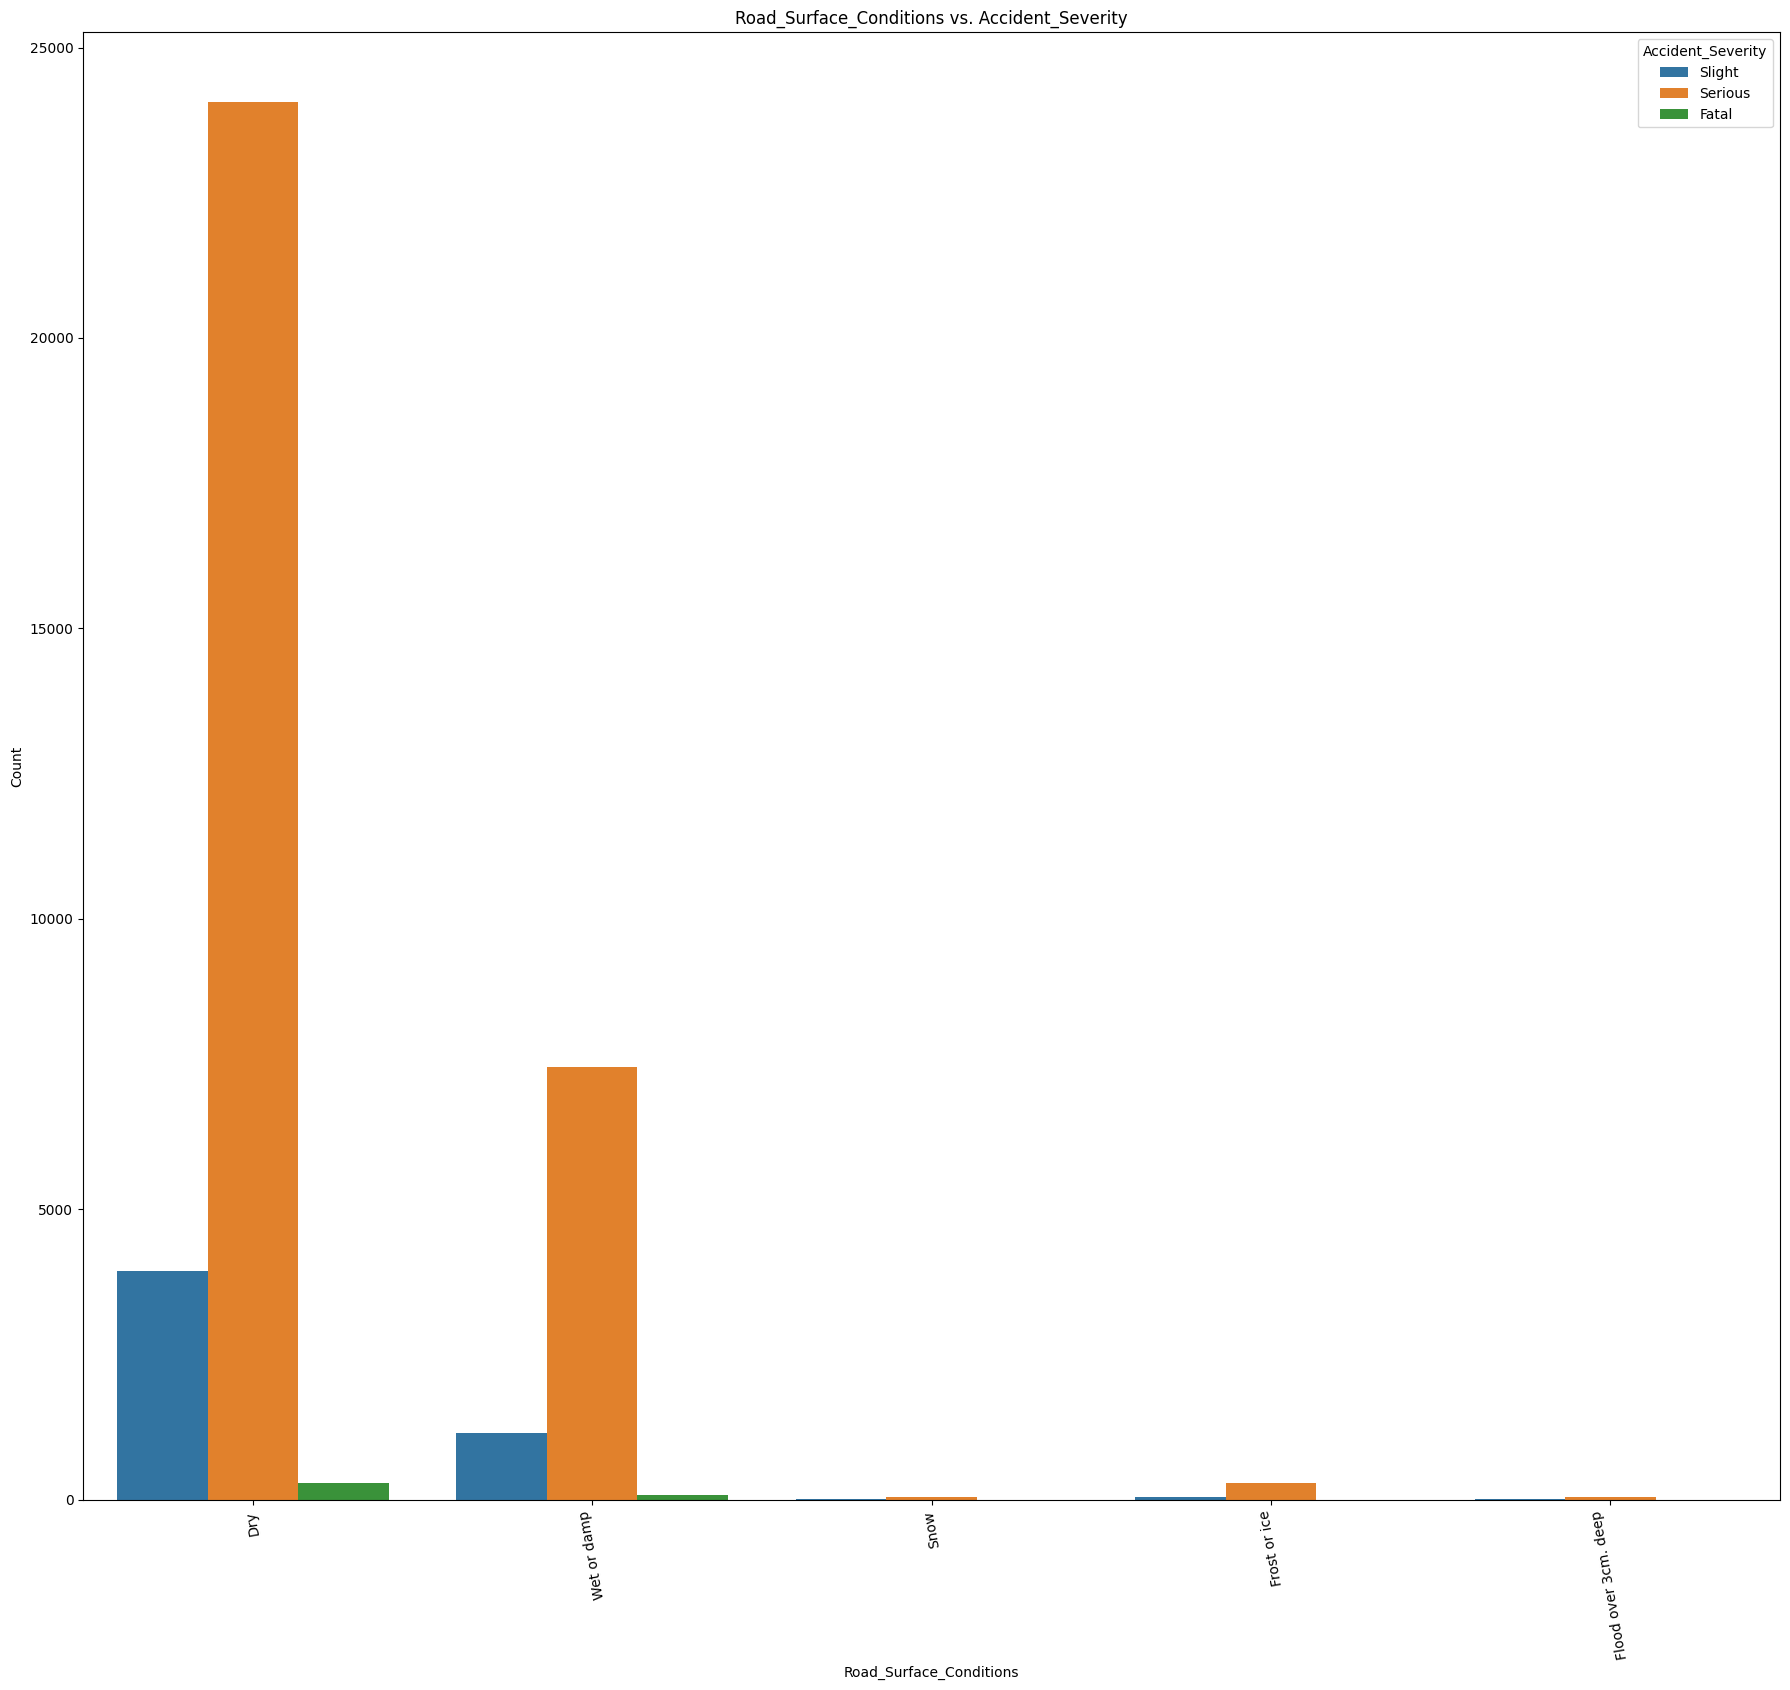

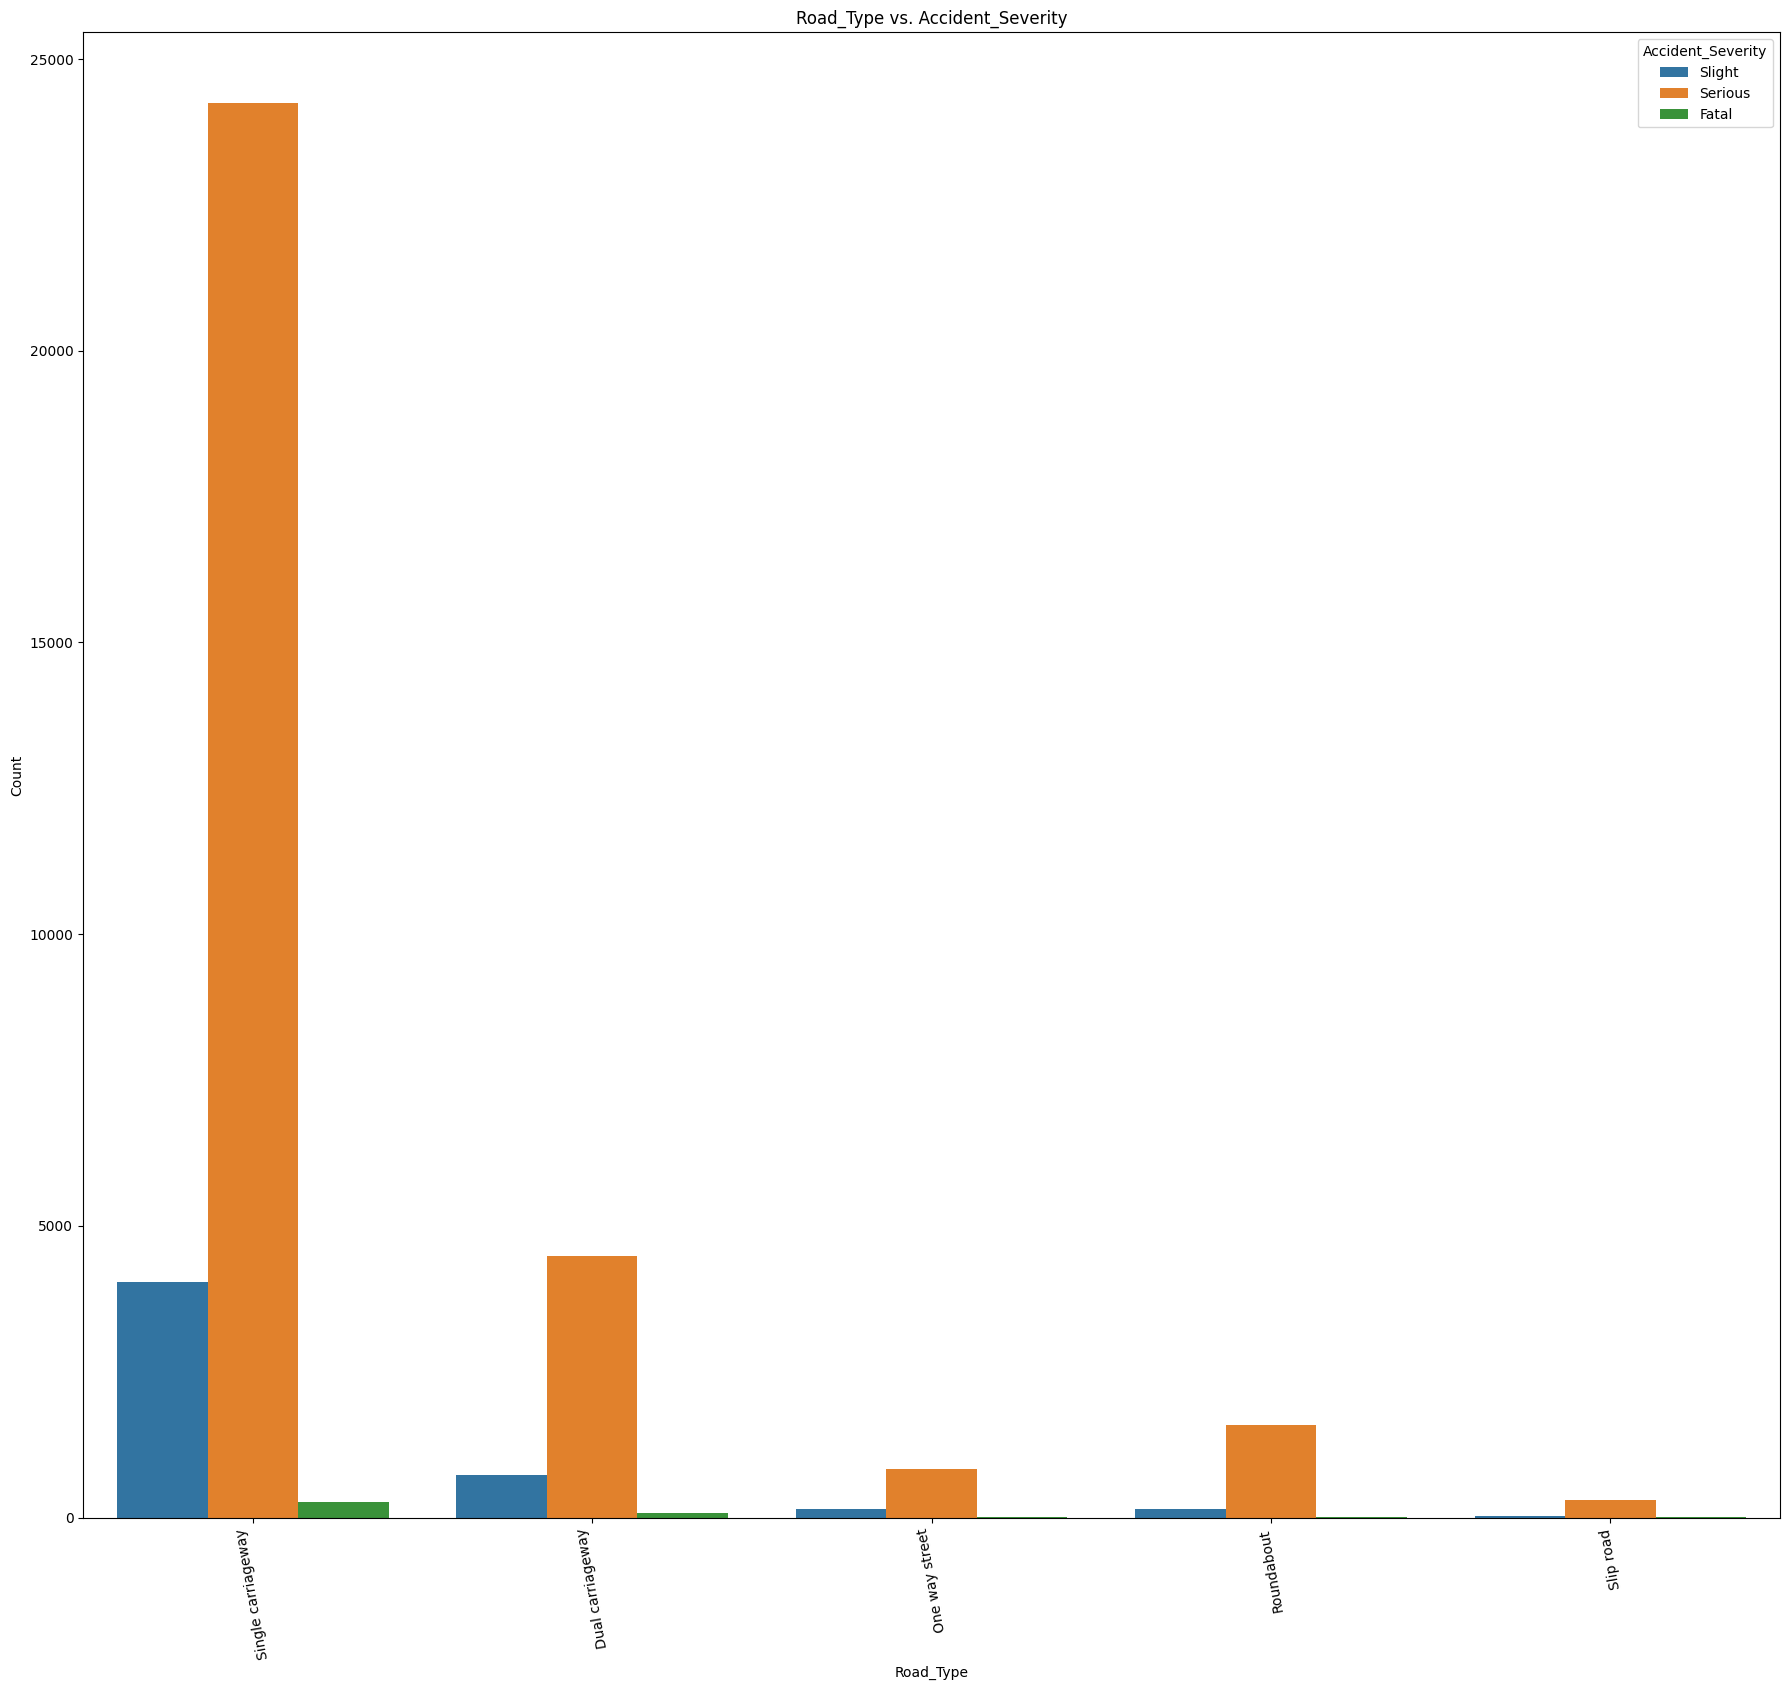

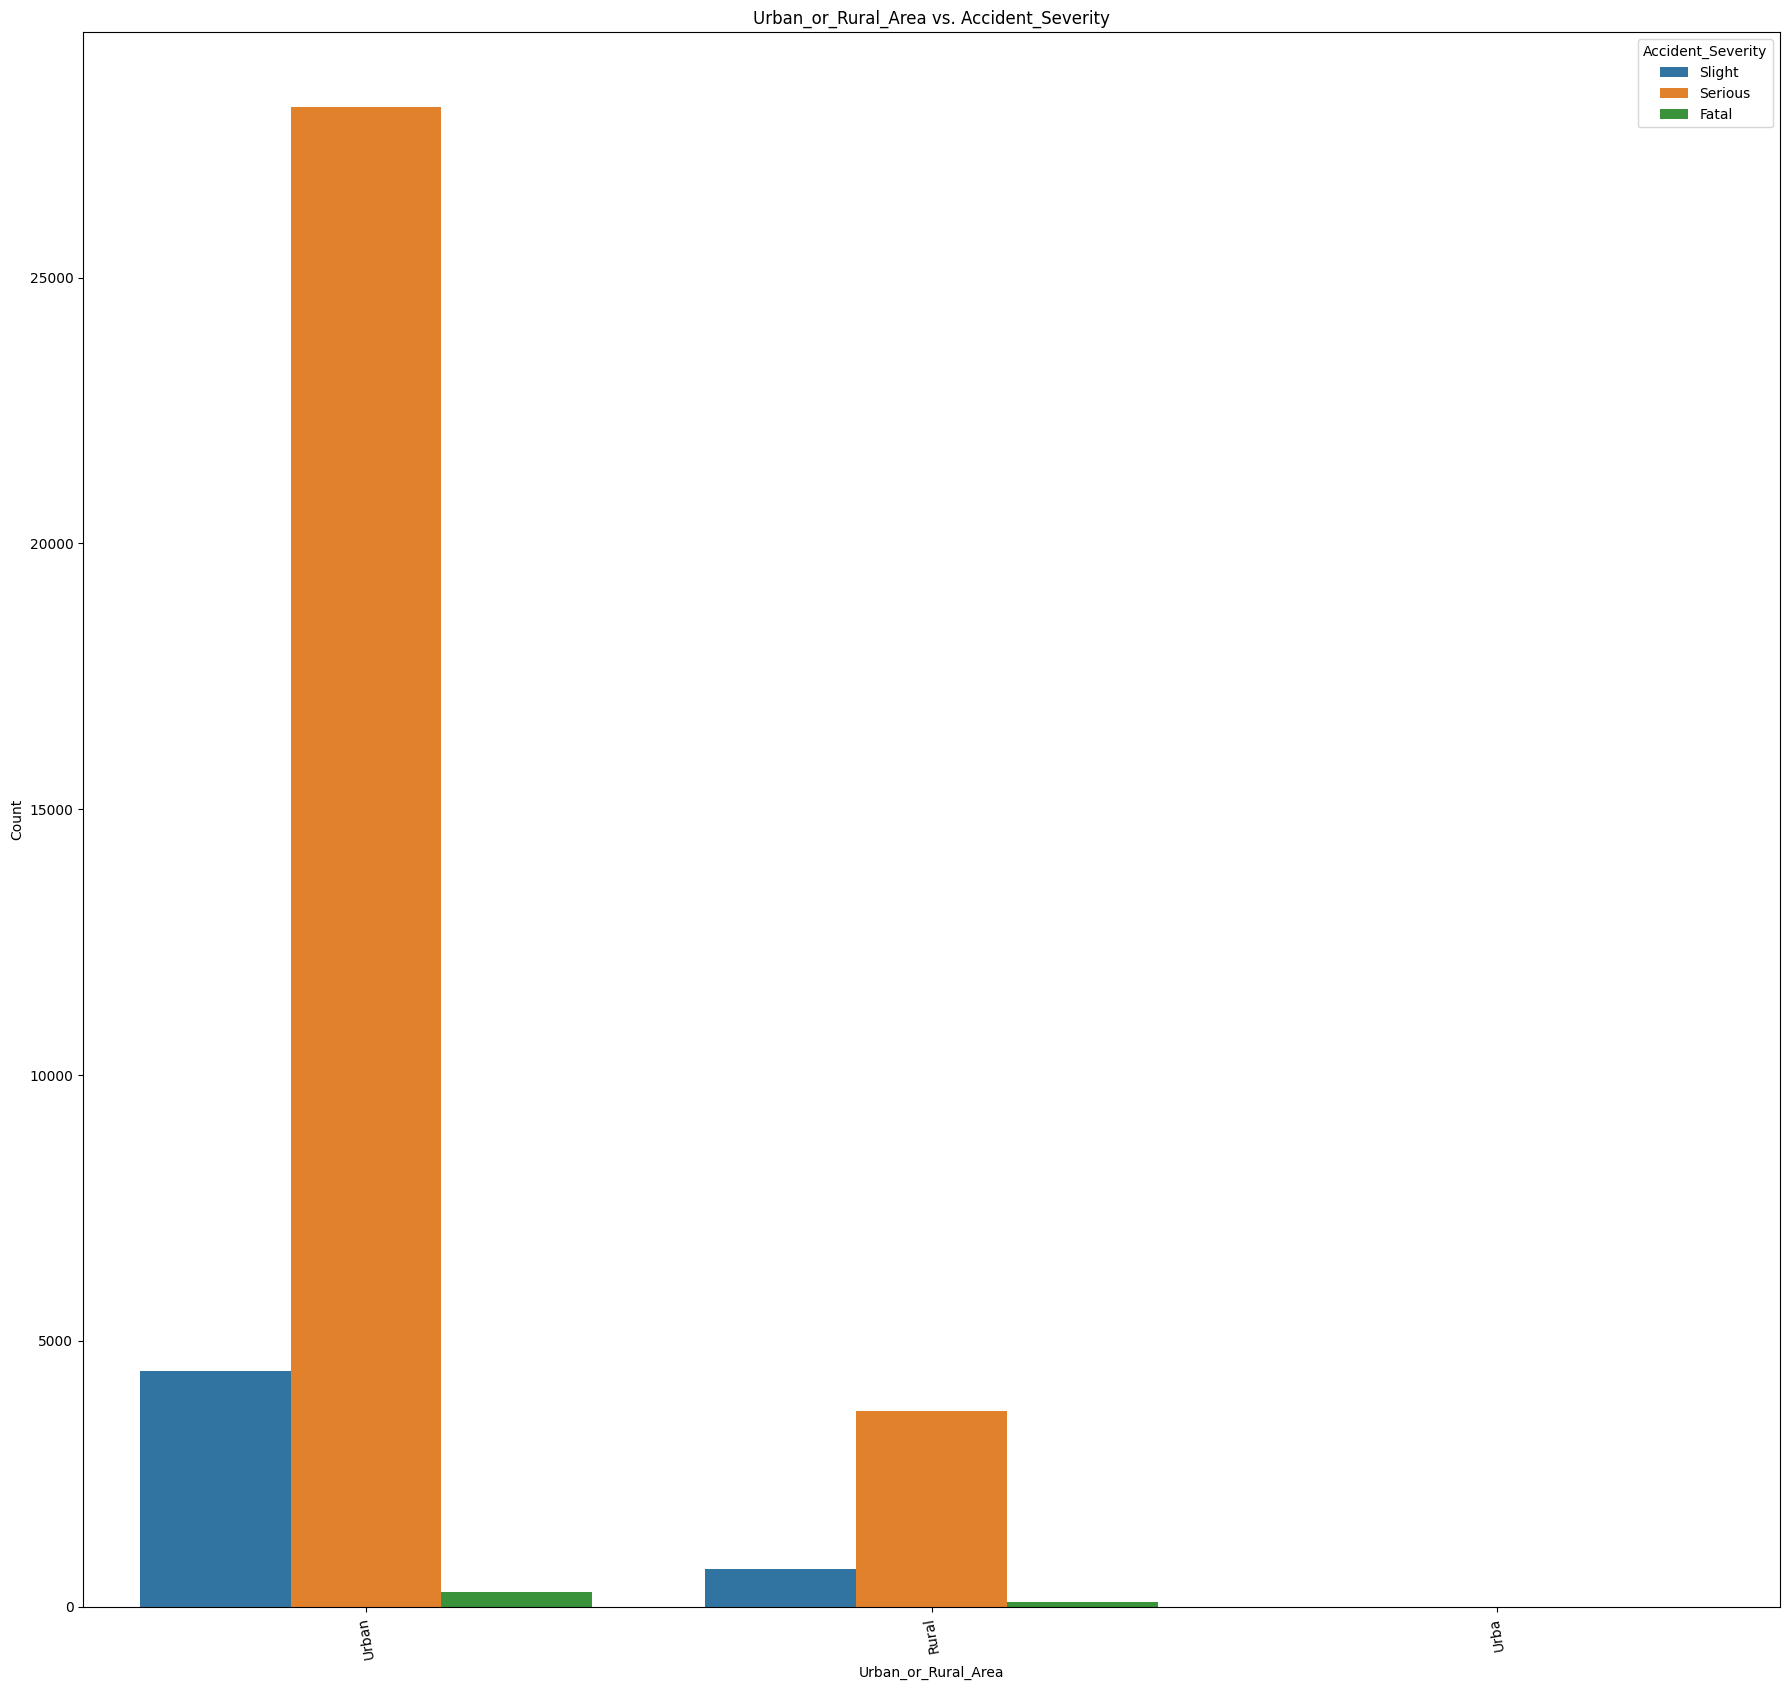

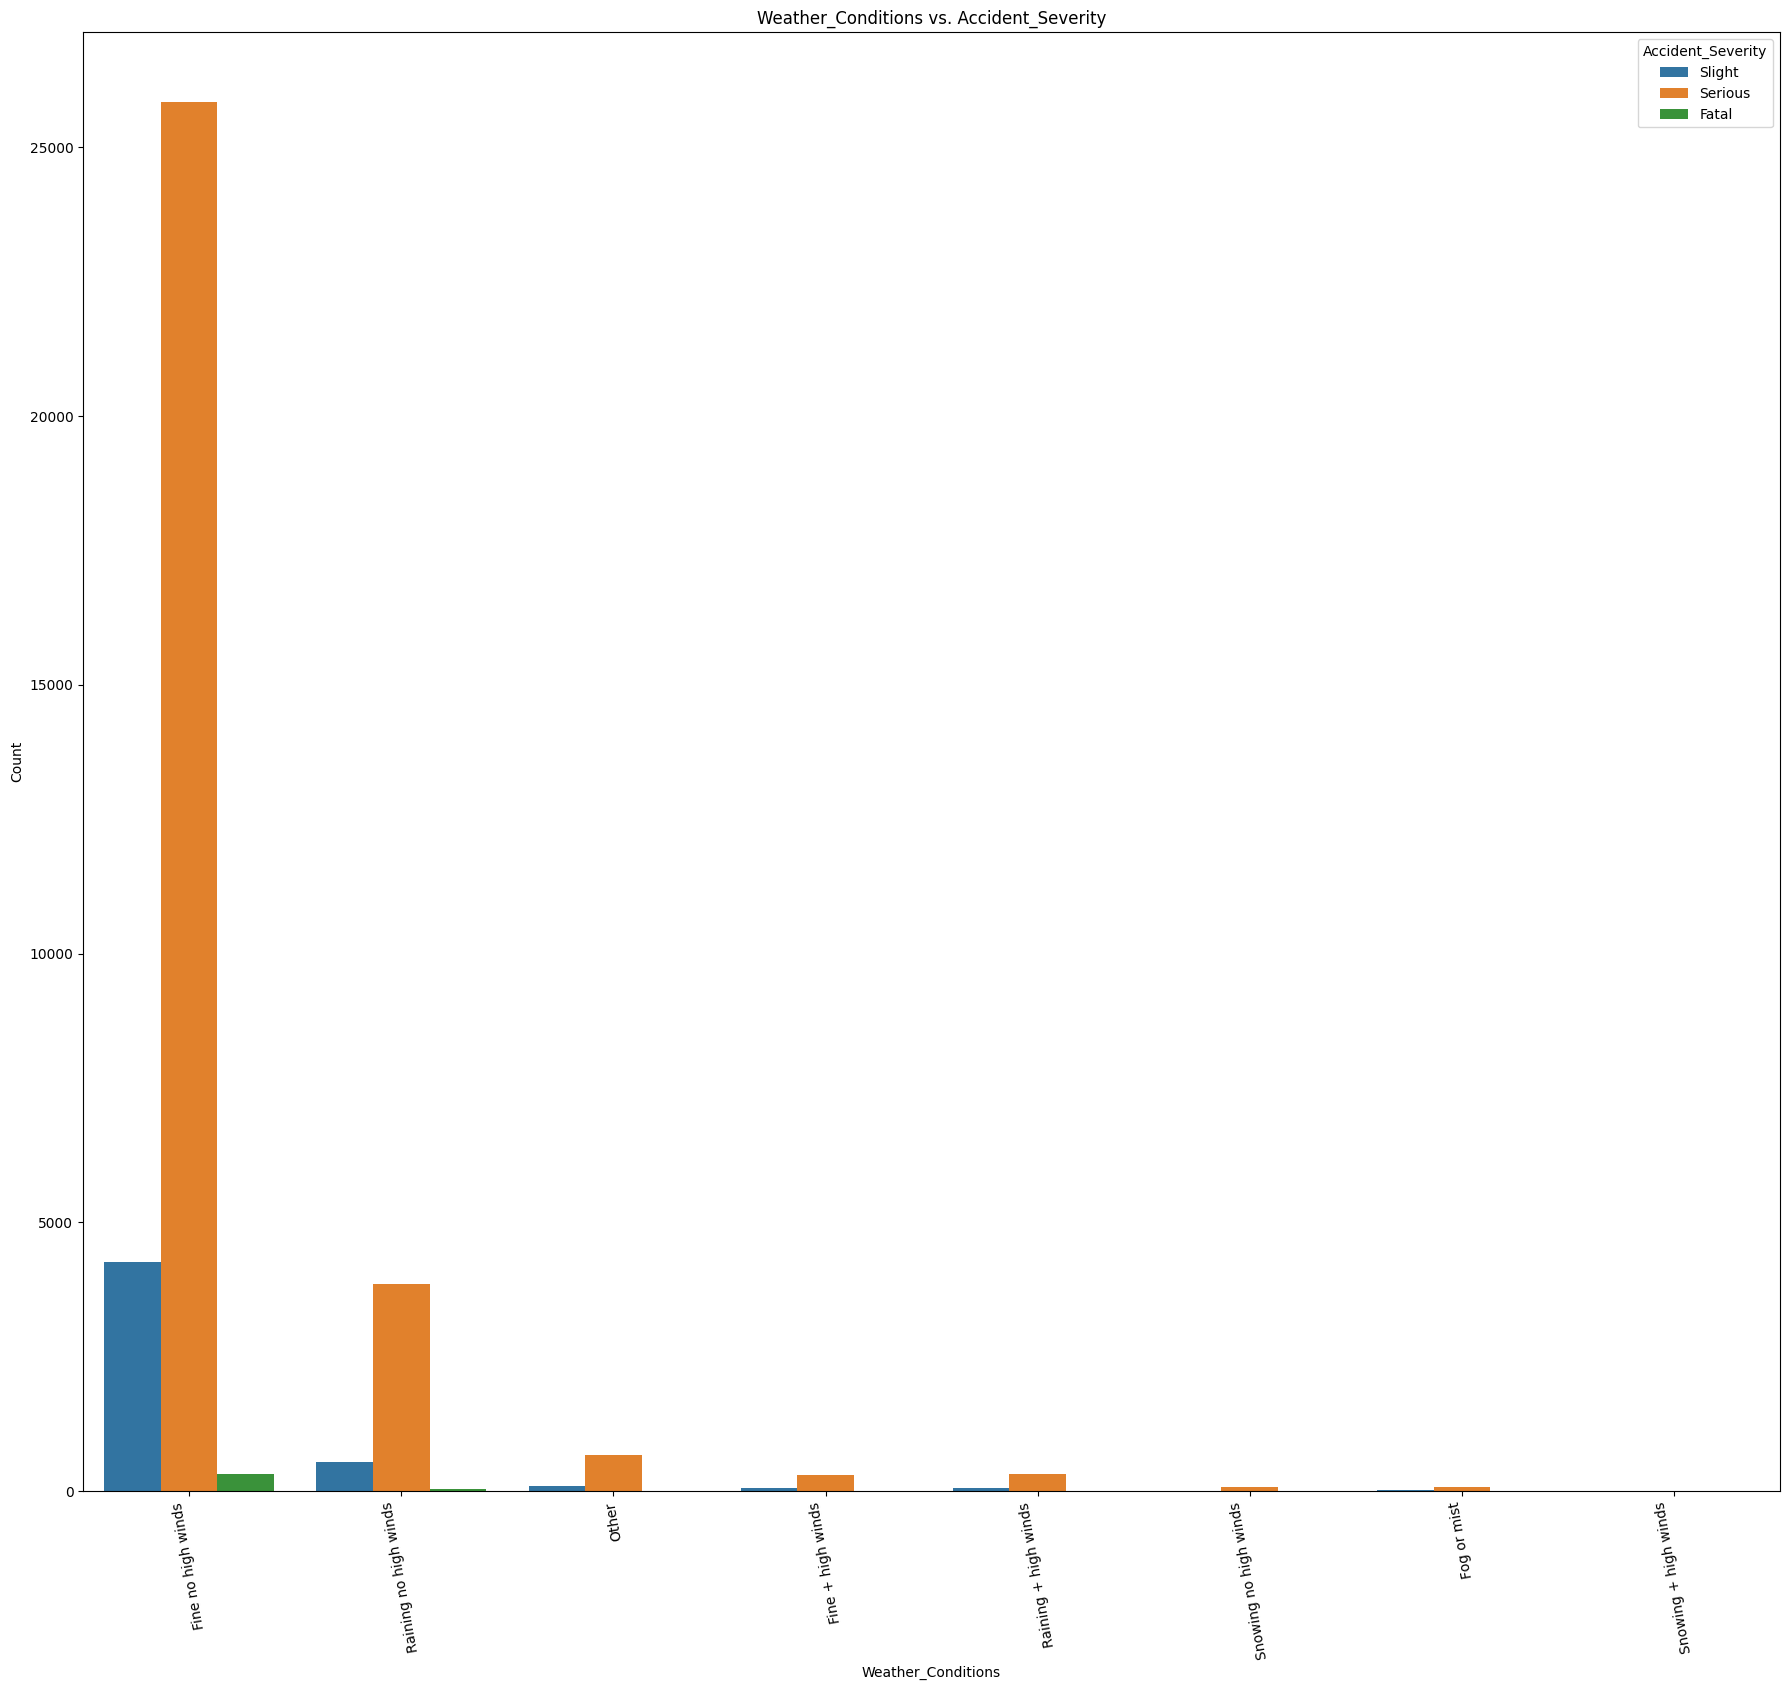

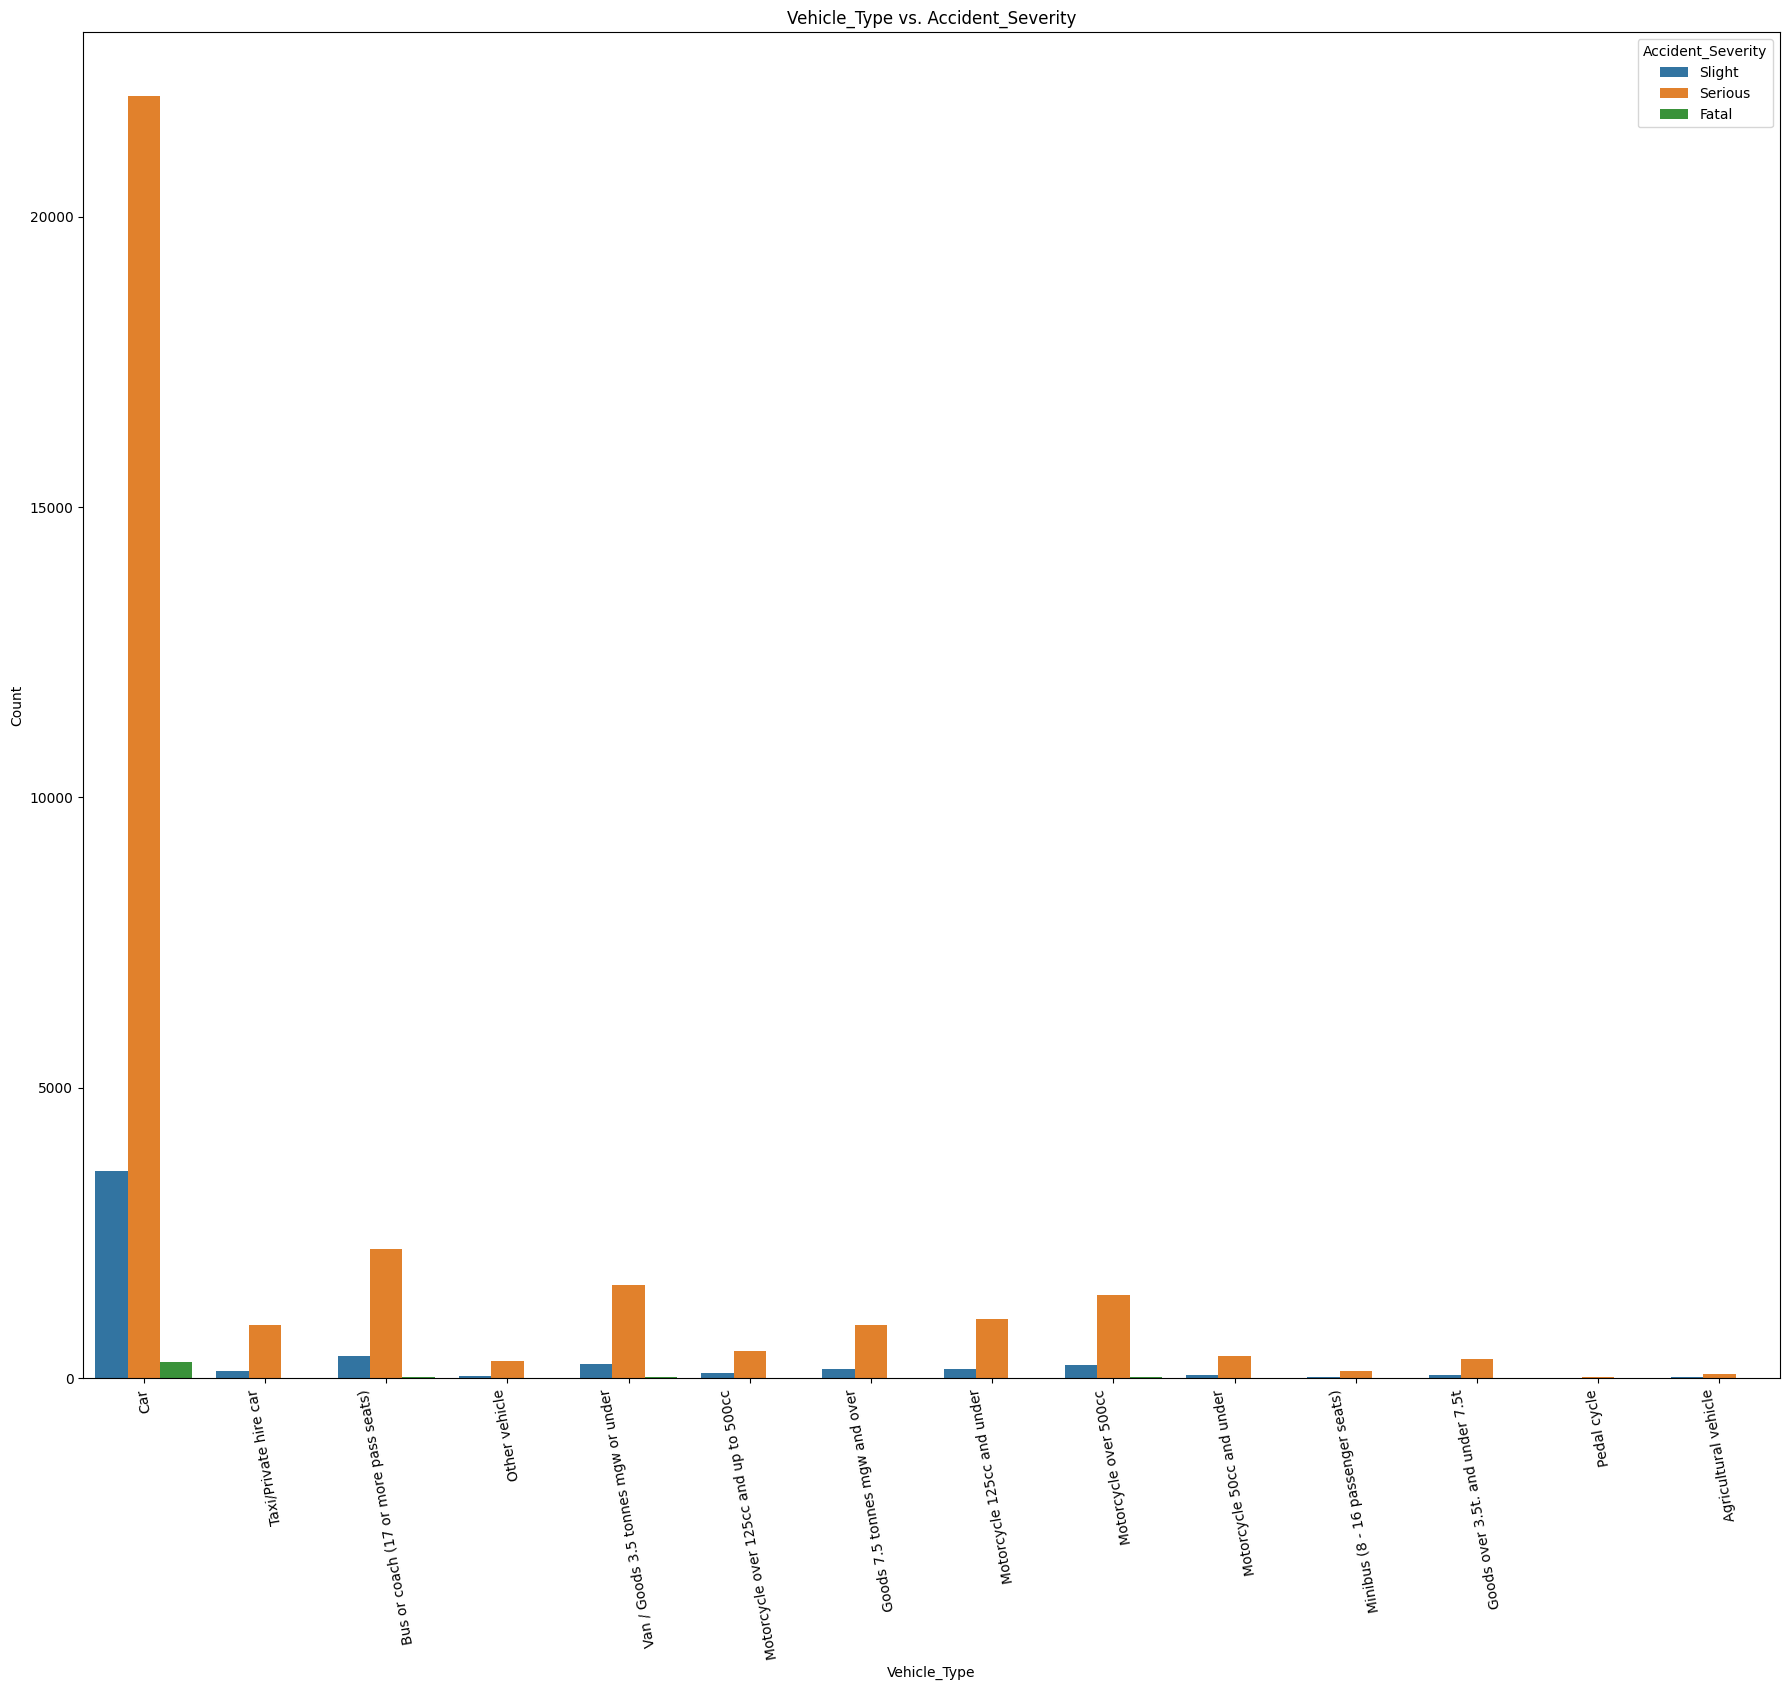

In [29]:
for feature in object_columns:
    plt.figure(figsize=(18, 17))
    sns.countplot(x=feature, hue='Accident_Severity', data=df)
    plt.title(f'{feature} vs. Accident_Severity')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Accident_Severity', labels=['Slight', 'Serious','Fatal'])
    plt.xticks(rotation=100)
    plt.tight_layout()
    plt.show()

In [20]:
corr=df.corr()
corr

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
Latitude,1.000000,-0.969905,0.133361,0.019691
Longitude,-0.969905,1.000000,-0.138610,-0.025759
Number_of_Casualties,0.133361,-0.138610,1.000000,0.214174
Number_of_Vehicles,0.019691,-0.025759,0.214174,1.000000


<Axes: >

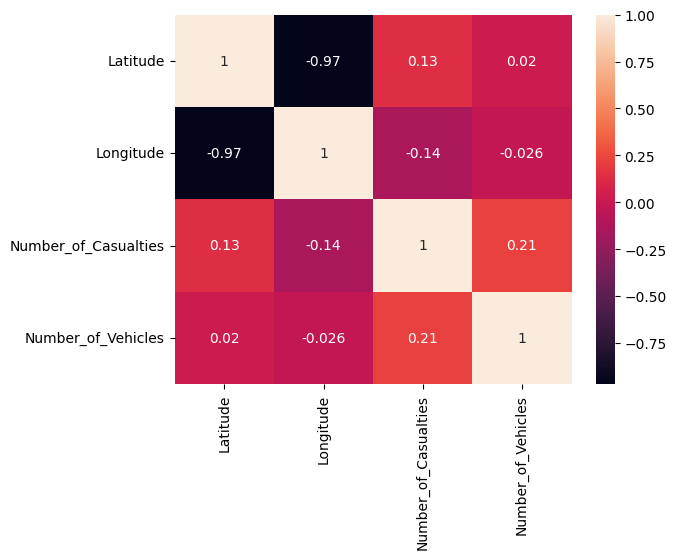

In [21]:
sns.heatmap(corr,annot=True)

1. **Accident Severity and Day/Night Conditions:**
   - Slight severity is associated with higher accuracy, possibly indicating that less severe accidents are more accurately recorded.
   - Accidents during the day or with sufficient light conditions are more accurately recorded.

2. **Light Condition and Districts (Liverpool, Manchester, Barnet):**
   - Accurate reporting of light conditions is observed, indicating good data quality.
   - Liverpool, Manchester, and Barnet show higher accuracy in the 'District' column, suggesting better data reliability or recording practices in these areas.

3. **Road Surface Conditions:**
   - 'Dry' road surface conditions are associated with higher accuracy, implying that accidents on dry roads are more reliably recorded.

4. **Road Type and Urban/Rural Areas:**
   - Single carriageway road types have higher accuracy, indicating more reliable reporting for this road type.
   - Accurate reporting in urban areas, suggesting better data quality or monitoring in urban regions.

5. **Weather Conditions:**
   - Accurate reporting during fine weather conditions, indicating reliable recording under clear weather.
   - Accurate reporting during high winds, suggesting good data quality under adverse weather conditions.

6. **Vehicle Types:**
   - Cars have higher accuracy in reporting, indicating more reliable data for this vehicle type.

In [141]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [142]:
catogories=['Index','Accident Date',	'Light_Conditions',	'District Area'	,	'Road_Surface_Conditions',	'Road_Type',	'Urban_or_Rural_Area',	'Weather_Conditions',	'Vehicle_Type','Accident_Severity']

In [143]:
label=LabelEncoder()

In [144]:
for i in catogories:
  df[i+'encode']=label.fit_transform(df[i])

In [145]:
df.drop(['Index','Accident Date',	'Light_Conditions',	'District Area'	,	'Road_Surface_Conditions',	'Road_Type',	'Urban_or_Rural_Area',	'Weather_Conditions',	'Vehicle_Type','Accident_Severity'],axis=1,inplace=True)

In [146]:
df.head()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Indexencode,Accident Dateencode,Light_Conditionsencode,District Areaencode,Road_Surface_Conditionsencode,Road_Typeencode,Urban_or_Rural_Areaencode,Weather_Conditionsencode,Vehicle_Typeencode,Accident_Severityencode
0,51.506187,-0.209082,1,2,244,212,1,185,0,3,2,1,2,1
1,51.495029,-0.173647,1,2,245,72,4,185,4,3,2,5,2,1
2,51.517715,-0.210215,1,3,246,1228,0,185,0,3,2,1,14,1
3,51.495478,-0.202731,1,4,247,748,4,185,0,3,2,1,1,1
4,51.488576,-0.192487,1,2,248,128,1,185,0,3,2,1,11,2


In [147]:
X=df.drop(['Accident_Severityencode'],axis=1)
y=df['Accident_Severityencode']

In [148]:
from imblearn.over_sampling import SMOTE

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

In [152]:
smote=SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [153]:
y_resampled.value_counts()

2    451171
1    451171
0    451171
Name: Accident_Severityencode, dtype: int64

In [154]:
lr=LogisticRegression()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()

In [156]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

for model in [lr, rfc, dtc, knn, gbc, abc]:
    print(model, '--------------------------------------------')
    abc = model.fit(X_resampled, y_resampled)
    Y_pred_train = abc.predict(X_resampled)
    Y_pred_test = abc.predict(X_test)
    As_train_pred = accuracy_score(Y_pred_train, y_resampled)
    As_test_pred = accuracy_score(Y_pred_test, y_test)
    cm = confusion_matrix(y_resampled, Y_pred_train)
    cr = classification_report(y_resampled, Y_pred_train)
    print("training Accuracy score \n", As_train_pred)
    print("==========" * 3)
    print("testing Accuracy score \n", As_test_pred)
    print("==========" * 3)
    print("Confusion matrix \n", cm)
    print("==========" * 3)
    print("CLASSIFICATION REPORT \n", cr)
    print("==========" * 3)


LogisticRegression() --------------------------------------------
training Accuracy score 
 0.3440343757318918
testing Accuracy score 
 0.3944689578965692
Confusion matrix 
 [[238935  27263 184973]
 [228812  26412 195947]
 [223529  27334 200308]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.35      0.53      0.42    451171
           1       0.33      0.06      0.10    451171
           2       0.34      0.44      0.39    451171

    accuracy                           0.34   1353513
   macro avg       0.34      0.34      0.30   1353513
weighted avg       0.34      0.34      0.30   1353513

RandomForestClassifier() --------------------------------------------
training Accuracy score 
 0.9999963059091416
testing Accuracy score 
 0.7721510365027587
Confusion matrix 
 [[451171      0      0]
 [     0 451166      5]
 [     0      0 451171]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0      